<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<b>Привет, Алексей!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду ревьюером твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом! 
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии расскрашены разными цветами: 
<br/>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> В случае корректного решения (или отдельных его моментов). На такие решения можно опираться в будущем.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Если есть возможность как-либо улучшить решение. Ты можешь учесть эти комментарии при доработке проекта, однако для зачета это не обязательно.
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Если решение требует внесения правок. Проект не может быть принят, если остались не отработанные комментарии данного типа.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

<div class="alert alert-info">
<b>Комментарий студента: Привет Юля. Спасибо за большое количество комментариев, увидел свои точки роста) Исправил только красные комментарии, так как время поджимает.</b>
<br>
</div>

# Анализ лояльности пользователей Яндекс Афиши

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Вводная часть <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> В любой работе важно оставлять вводную часть. Она помогает быстро понять цель, контекст и структуру работы, что будет удобно не только для тебя при возвращении к проекту спустя время, но и любому другому читателю (если, например, публикуешь в открытый доступ для портфолио). Воспринимаем эту тетрадку не просто как выполнение домашней работы на курсе, а как полноценный исследовательский проект.

Как правило, в вводную часть включают название проекта, краткое описание цели, используемых данных (источники, объем, особенности), нюансы самого проекта (специфические условия, ограничения, предположения и т.д.). Иногда также сразу обозначают план шагов. Другими словами, вводная часть призвана отразить, что мы делаем, с чем работаем и на каких условиях.
</div>

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [1]:
!pip install sqlalchemy -q

In [2]:
!pip install dotenv -q

In [3]:
import pandas as pd
from sqlalchemy import create_engine
import os 
from dotenv import load_dotenv
import matplotlib.pyplot as plt 
import numpy as np

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Импорты <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Чтобы при установке новой библиотеки не выводилась информация о процессе и зависимостях, можно добывлять опцию `--quiet` или просто `-q`. 
    
    
* Все необходимые библиотеки лучше подгружаешь сразу в начале проекта, это соответсвует стандартам оформления кода <a href='https://pyplanet.ru/article/pep-0008.html'>PEP 8</a>. Такой подход позволяет сразу видеть, какое окружение необходимо для запуска проекта, избежать дублирования импортов в разных частях кода, а также облегчить отладку и переносимость проекта. 
    
    
* Хорошей практикой также является упорядочивание импортов. PEP 8 рекомендует снчала подгружать стандартные python-библиотеки, затем сторонние. Но для удобства каждую их этих групп также можно стуктурировать по тематике. Например, библиотеки для работы с данными, для работы с графиками и т.д. Тогда будет удобнее поддерживать порядок в импортах от проекта к проекту, не подгружать лишнее.
    
    
* Перед отправкой проекта / публикацией важно сбрасывать ядро (очищать память от созданных объектов) и заново запускать проект с самого начала, чтобы проверить на наличие ошибок в коде при последовательном исполнении ячеек. Сейчас этого сделано не было, нумерация ячеек начинается не с 1.
    
</div>

In [4]:
load_dotenv('secret2.env') 

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
) 

In [5]:
engine = create_engine(connection_string)

In [6]:
query = '''
SELECT 
    p.user_id,
    p.device_type_canonical,
    p.order_id,
    p.created_dt_msk AS order_dt,
    p.created_ts_msk AS order_ts,
    p.currency_code,
    p.revenue,
    p.tickets_count,
    p.created_dt_msk::DATE - LAG(p.created_dt_msk::DATE) OVER (
        PARTITION BY p.user_id 
        ORDER BY p.created_dt_msk
    ) AS days_since_prev,
    p.event_id,
    e.event_name_code AS event_name,
    e.event_type_main,
    p.service_name,  -- берём из purchases, как указано в схеме
    c.city_name,
    r.region_name
FROM afisha.purchases AS p
JOIN afisha.events AS e
    ON p.event_id = e.event_id
JOIN afisha.city AS c
    ON e.city_id = c.city_id
JOIN afisha.regions AS r
    ON c.region_id = r.region_id
WHERE 
    p.device_type_canonical IN ('mobile', 'desktop')
    AND e.event_type_main != 'фильм'
ORDER BY p.user_id
'''

In [7]:
df = pd.read_sql_query(query, con=engine)

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Загрузка данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Выгрузка данных проведена корректно! Была выполнена необходимая фильтрация данных, выгружены только необходимые для анализа данные. Отлично, что сразу подсчитываешь время между заказами для каждого пользователя.
 
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Сейчас ты явным образом прописываешь параметры подключения к БД. В таком виде выкладывать работу в публичный доступ небезопасно, кто-то сможет завладеть подключением, украсть или повредить данные. Лучше сразу в процессе работы держать чувствиительные значения отдельно от основного содержания, иначе есть высокий риск забыть об этом нюансе. По этой же причине нужно убрать ключи и из описания задания.
    
Чтобы засекретить подключение, необходимо сложить все параметры в `.env` файл (или другой конфигурационный файл вне Git) и указать его в `.gitignore`:

```python
DB_NAME="..."
DB_HOST="..."
DB_PORT="..."
DB_USER="..."
DB_PASSWORD="..."
```
    
В самом проекте мы можем обращаться к сохраненным параметрам, для этого нам потребуются библиотеки `dotenv`, чтобы загрузить переменные окружения, и `os`, чтобы обратиться к ним:
    
```python
import os
import dotenv
    
load_dotenv() # автоматически ищет .env в текущей директории
    
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
) 
```
</div>

<div class="alert alert-info">
<b>Комментарий студента: поправил</b>
<br>
</div>

In [8]:
df

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Глиногорск,Каменевский регион
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Глиногорск,Каменевский регион
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Глиногорск,Каменевский регион
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Озёрск,Североярская область
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Родниковецк,Озернинский край
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290606,fffcd3dde79eb2c,mobile,368562,2024-10-27,2024-10-27 17:53:53,rub,1448.36,6,0.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,другое,Весь в билетах,Глиногорск,Каменевский регион
290607,fffcd3dde79eb2c,mobile,368591,2024-10-27,2024-10-27 17:54:52,rub,965.57,4,0.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,другое,Весь в билетах,Глиногорск,Каменевский регион
290608,fffcd3dde79eb2c,desktop,8473772,2024-10-30,2024-10-30 13:37:43,rub,178.95,2,3.0,205231,74883818-57a6-494a-b162-bb0260877cbf,театр,Прачечная,Глиногорск,Каменевский регион
290609,fffeeb3c120cf0b,desktop,5526067,2024-09-24,2024-09-24 10:07:42,rub,661.53,2,NaN,454526,6f4c6a50-0106-407b-8f54-332c740b01da,стендап,Билеты без проблем,Ягодиновка,Широковская область


---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

- В day_since_prev стоит привести данные к int 
- Категориальные данные (service_name,city_name,region_name) стоит привести к нижнему регистра для устранения неявных дубликатов

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Проверка корректности загруженных данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 

* Хорошо, что убеждаешь в корректности данных! Если при подгрузке возникли проблемы, а мы их не обнаружим, все последующие расчеты могут быть искажены.

    
* Круто, что не забываешь зафиксировать промежуточные наблюдения в выводах! Если потребуется вернуться к проекту спустя время, будет проще освежить в памяти все ключевые этапы работы, что и почему мы делали, что получили.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Обрати внимание, что если не ограничивать количество выводимой информации, то вывод ограничится только при отображении, но в json (в виде которых хранятся jupyter-ноутбуки) на диске будут все данные, что будет тормозить открытие и работу тетрадки. Чтобы такого не происходило, следует ограничивать вывод несколькими строками: `head`, `tail`, `sample`.
    
    
* Стоило также вывести `info`, чтобы понять, насколько у нас много данных, в каких они типах, есть ли пропуски.
 
    
* По результатам проверки корректности загруженных данных мы планируем дальнейшие шаги по обработке. Здесь можно было отметить, что нам также потребуется убедиться, что пропуски действительно имеются только у первых заказов, выполнить проверку на дубликаты (полных и неполных), проверить категориальные столбцы на предмет неявных дубликатов (разный регистр, разный формат записи, опечатки) и все числовые столбцы на наличие невалидных значений и аномалий, опционально сменить типы данных на более оптимальные, чтобы уменьшить тяжесть данных.
    
</div>

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [9]:
df_currency=pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

In [11]:
df_currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [12]:
df_currency['data']=df_currency['data'].astype('datetime64')

In [13]:
df_currency['coeff_cur']=df_currency['curs']/df_currency['nominal']

In [14]:
df_currency

,data,nominal,curs,cdx,coeff_cur
0,2024-01-10,100,19.9391,kzt,0.199391
1,2024-01-11,100,19.7255,kzt,0.197255
2,2024-01-12,100,19.5839,kzt,0.195839
3,2024-01-13,100,19.4501,kzt,0.194501
4,2024-01-14,100,19.4501,kzt,0.194501
...,...,...,...,...,...
352,2024-12-27,100,19.2705,kzt,0.192705
353,2024-12-28,100,19.5105,kzt,0.195105
354,2024-12-29,100,19.4860,kzt,0.194860
355,2024-12-30,100,19.4860,kzt,0.194860


In [15]:
new_df=df.merge(df_currency,left_on='order_dt',right_on='data',how='inner')

In [16]:
def convert_currency(row):
    if row['currency_code']=='rub':
        return row['revenue']
    elif row['currency_code'] =='kzt':
        return row['revenue']*row['coeff_cur']
    else:
        return None 

In [17]:
new_df['revenue_rub']=new_df.apply(convert_currency,axis=1)

In [18]:
new_df

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,...,event_type_main,service_name,city_name,region_name,data,nominal,curs,cdx,coeff_cur,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,...,театр,Край билетов,Глиногорск,Каменевский регион,2024-08-20,100,18.6972,kzt,0.186972,1521.94
1,002bf837be989ea,mobile,2543446,2024-08-20,2024-08-20 16:52:43,rub,1503.25,4,NaN,453660,...,концерты,Билеты без проблем,Каменский,Боровлянский край,2024-08-20,100,18.6972,kzt,0.186972,1503.25
2,008e87176c21913,mobile,1955732,2024-08-20,2024-08-20 14:34:59,rub,39.72,2,NaN,211375,...,другое,Лучшие билеты,Радужнополье,Широковская область,2024-08-20,100,18.6972,kzt,0.186972,39.72
3,00ac6ea01bf4b8b,mobile,8614364,2024-08-20,2024-08-20 17:27:10,rub,204.76,3,5.0,552779,...,концерты,Мой билет,Луговаярово,Широковская область,2024-08-20,100,18.6972,kzt,0.186972,204.76
4,010ff037253e138,desktop,181947,2024-08-20,2024-08-20 16:01:51,rub,1550.40,4,NaN,508859,...,концерты,Яблоко,Сосновечин,Травиницкий округ,2024-08-20,100,18.6972,kzt,0.186972,1550.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290606,fe237d2cfd6e503,mobile,1160001,2024-06-10,2024-06-10 07:14:53,rub,1007.51,3,0.0,439889,...,концерты,Облачко,Леснойск,Чистогорская область,2024-06-10,100,19.8618,kzt,0.198618,1007.51
290607,fe237d2cfd6e503,mobile,5931777,2024-06-10,2024-06-10 15:18:11,rub,58.09,1,0.0,523552,...,концерты,Билеты без проблем,Глиногорск,Каменевский регион,2024-06-10,100,19.8618,kzt,0.198618,58.09
290608,fe237d2cfd6e503,mobile,3866020,2024-06-10,2024-06-10 14:35:58,rub,10.53,1,0.0,384441,...,другое,Лови билет!,Озёрск,Североярская область,2024-06-10,100,19.8618,kzt,0.198618,10.53
290609,fe237d2cfd6e503,mobile,3141136,2024-06-10,2024-06-10 18:52:06,rub,179.53,2,0.0,534554,...,другое,Мой билет,Светополье,Яблоневская область,2024-06-10,100,19.8618,kzt,0.198618,179.53


In [19]:
new_df=new_df.drop(['nominal','curs','cdx','data'],axis=1)

In [20]:
new_df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,coeff_cur,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Глиногорск,Каменевский регион,0.186972,1521.94
1,002bf837be989ea,mobile,2543446,2024-08-20,2024-08-20 16:52:43,rub,1503.25,4,NaN,453660,ef3f74ed-6c81-453a-9499-97d8735a0f94,концерты,Билеты без проблем,Каменский,Боровлянский край,0.186972,1503.25
2,008e87176c21913,mobile,1955732,2024-08-20,2024-08-20 14:34:59,rub,39.72,2,NaN,211375,06ae0e6c-cb45-4b2c-a681-787d2c7b9a47,другое,Лучшие билеты,Радужнополье,Широковская область,0.186972,39.72
3,00ac6ea01bf4b8b,mobile,8614364,2024-08-20,2024-08-20 17:27:10,rub,204.76,3,5.0,552779,146324a1-9190-4c64-bf37-f3b41ca730b3,концерты,Мой билет,Луговаярово,Широковская область,0.186972,204.76
4,010ff037253e138,desktop,181947,2024-08-20,2024-08-20 16:01:51,rub,1550.40,4,NaN,508859,cb3759d1-9b7a-4e3e-b0de-24cdfd4424e5,концерты,Яблоко,Сосновечин,Травиницкий округ,0.186972,1550.40


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Перевод выручки в рубли <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> С шагом справились, результат корректный! Хорошо, что убеждаешься в этом.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Сперва следовало убедиться в корректности данных с курсом, по всем ли датам есть курс, адекватные ли там значения, нет ли дубликатов, а уже потом переходить к конвертации.
    
    
* Сейчас ты создаешь дополнительные таблицы (был `df`, его забросили, перешли в `new_df`), которые начинают засорять память. Лучше работать с каким-то одним объектом, а если нужны посторонние, то создавать их времменно на момент шага, а после его завершения удалять через `del`.
    

* Вместо цикличного `apply`, который за раз работает с одной строкой, можно использовать довольно удобный метод [where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html). Мы можем применить данный метод к столбцу с выручкой и указать условие, которое будем проверять, а также альтернативный вариант значения. Если условие выполняется, то берется значение из столбца, если нет - альтернативное значение. Тогда расчет выручки в рублях будет выглядеть следующим образом:
    
    ```python
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100)
```
    
* Для проверки результата было бы лучше вывести на обозрение только связанные с данной задачей столбцы, чтобы не перегружать читателя лишним. При этом отобразить не первые 5 строк, в которую попали только исходно рублевые наблюдения, а проверить оба кейса, и когда корректировка требовалась, и когда нет. Также стоит проверить, не образовалось ои пропусков.
    
    
* Это исследовательская работа, а не скрипт, поэтому важно фиксировать свой ход мыслей, пояснять свои шаги и делать выводы относительно результатов, то есть вести последовательный сторителлинг, что зачем и почему мы делаем, что по итогу получаем.
    
    
* Напоминаю про моменты, которые уже поясняла в предыдущик комментариях: вывод неограниченного количества строк.

</div>

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [21]:
new_df['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

In [23]:
new_df[['revenue_rub','coeff_cur','revenue','days_since_prev']]=new_df[['revenue_rub','coeff_cur','revenue','days_since_prev']].apply(pd.to_numeric,downcast='float')

In [24]:
new_df[['event_id','tickets_count','order_id']]=new_df[['event_id','tickets_count','order_id']].apply(pd.to_numeric,downcast='integer')

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int32         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float32       
 7   tickets_count          290611 non-null  int8          
 8   days_since_prev        268678 non-null  float32       
 9   event_id               290611 non-null  int32         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

In [26]:
new_df['device_type_canonical'].unique()

array(['mobile', 'desktop'], dtype=object)

In [27]:
new_df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,coeff_cur,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.939941,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Глиногорск,Каменевский регион,0.186972,1521.939941
1,002bf837be989ea,mobile,2543446,2024-08-20,2024-08-20 16:52:43,rub,1503.250000,4,NaN,453660,ef3f74ed-6c81-453a-9499-97d8735a0f94,концерты,Билеты без проблем,Каменский,Боровлянский край,0.186972,1503.250000
2,008e87176c21913,mobile,1955732,2024-08-20,2024-08-20 14:34:59,rub,39.720001,2,NaN,211375,06ae0e6c-cb45-4b2c-a681-787d2c7b9a47,другое,Лучшие билеты,Радужнополье,Широковская область,0.186972,39.720001
3,00ac6ea01bf4b8b,mobile,8614364,2024-08-20,2024-08-20 17:27:10,rub,204.759995,3,5.0,552779,146324a1-9190-4c64-bf37-f3b41ca730b3,концерты,Мой билет,Луговаярово,Широковская область,0.186972,204.759995
4,010ff037253e138,desktop,181947,2024-08-20,2024-08-20 16:01:51,rub,1550.400024,4,NaN,508859,cb3759d1-9b7a-4e3e-b0de-24cdfd4424e5,концерты,Яблоко,Сосновечин,Травиницкий округ,0.186972,1550.400024


In [28]:
new_df['event_type_main']=new_df['event_type_main'].str.lower()

In [29]:
new_df['service_name']=new_df['service_name'].str.lower()

In [30]:
new_df['city_name']=new_df['city_name'].str.lower()

In [31]:
new_df['region_name']=new_df['region_name'].str.lower()

In [32]:
new_df

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,coeff_cur,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.939941,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,край билетов,глиногорск,каменевский регион,0.186972,1521.939941
1,002bf837be989ea,mobile,2543446,2024-08-20,2024-08-20 16:52:43,rub,1503.250000,4,NaN,453660,ef3f74ed-6c81-453a-9499-97d8735a0f94,концерты,билеты без проблем,каменский,боровлянский край,0.186972,1503.250000
2,008e87176c21913,mobile,1955732,2024-08-20,2024-08-20 14:34:59,rub,39.720001,2,NaN,211375,06ae0e6c-cb45-4b2c-a681-787d2c7b9a47,другое,лучшие билеты,радужнополье,широковская область,0.186972,39.720001
3,00ac6ea01bf4b8b,mobile,8614364,2024-08-20,2024-08-20 17:27:10,rub,204.759995,3,5.0,552779,146324a1-9190-4c64-bf37-f3b41ca730b3,концерты,мой билет,луговаярово,широковская область,0.186972,204.759995
4,010ff037253e138,desktop,181947,2024-08-20,2024-08-20 16:01:51,rub,1550.400024,4,NaN,508859,cb3759d1-9b7a-4e3e-b0de-24cdfd4424e5,концерты,яблоко,сосновечин,травиницкий округ,0.186972,1550.400024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290606,fe237d2cfd6e503,mobile,1160001,2024-06-10,2024-06-10 07:14:53,rub,1007.510010,3,0.0,439889,58574140-962c-49a3-af70-b773a05661a3,концерты,облачко,леснойск,чистогорская область,0.198618,1007.510010
290607,fe237d2cfd6e503,mobile,5931777,2024-06-10,2024-06-10 15:18:11,rub,58.090000,1,0.0,523552,b191f925-e0cb-43b0-a49e-8fb1563c05d0,концерты,билеты без проблем,глиногорск,каменевский регион,0.198618,58.090000
290608,fe237d2cfd6e503,mobile,3866020,2024-06-10,2024-06-10 14:35:58,rub,10.530000,1,0.0,384441,108c5bfa-b11e-47ac-a482-d0e76702508e,другое,лови билет!,озёрск,североярская область,0.198618,10.530000
290609,fe237d2cfd6e503,mobile,3141136,2024-06-10,2024-06-10 18:52:06,rub,179.529999,2,0.0,534554,3ccd92b9-5450-40a1-a7a8-5075cf90cc6a,другое,мой билет,светополье,яблоневская область,0.198618,179.529999


In [33]:
new_df['revenue_rub'].describe()

count    290611.000000
mean        555.571960
std         875.498169
min         -90.760002
25%         113.970001
50%         351.140015
75%         802.049988
max       81174.539062
Name: revenue_rub, dtype: float64

In [34]:
new_df['tickets_count'].describe()

count    290611.000000
mean          2.754311
std           1.170620
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

In [35]:
new_df['revenue_rub'].median()

351.14

In [36]:
new_df['tickets_count'].median()

3.0

In [37]:
new_df['revenue_rub'].mode()

0    0.0
dtype: float32

In [38]:
new_df['tickets_count'].mode()

0    3
dtype: int8

Text(0.5, 0, 'Выручка')

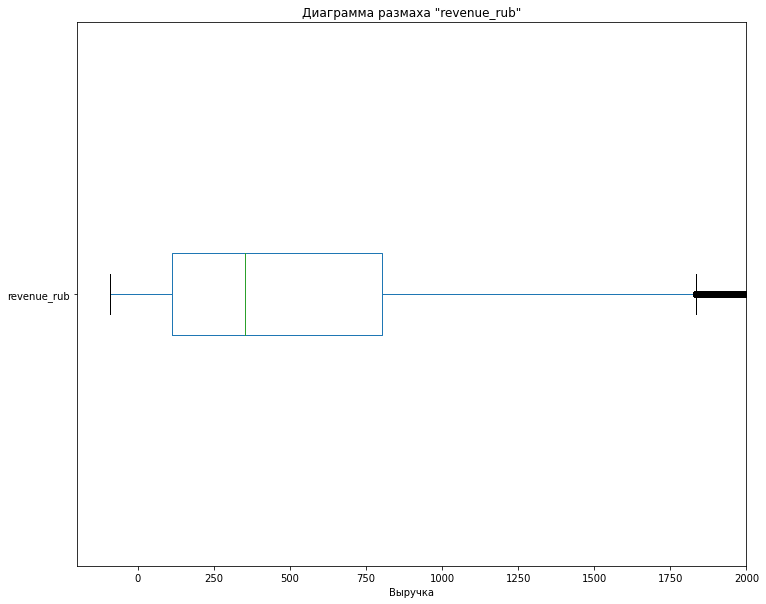

In [39]:
new_df['revenue_rub'].plot(kind='box',
                           figsize=(12,10),
                           vert=False,
                           title='Диаграмма размаха "revenue_rub"')
plt.xlim(left=-200,right=2000)
plt.xlabel('Выручка')

In [40]:
percentile_99=np.percentile(new_df['revenue_rub'],99)

In [41]:
fil_new_df=new_df[new_df['revenue_rub']<percentile_99]

In [42]:
fil_new_df

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,coeff_cur,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.939941,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,край билетов,глиногорск,каменевский регион,0.186972,1521.939941
1,002bf837be989ea,mobile,2543446,2024-08-20,2024-08-20 16:52:43,rub,1503.250000,4,NaN,453660,ef3f74ed-6c81-453a-9499-97d8735a0f94,концерты,билеты без проблем,каменский,боровлянский край,0.186972,1503.250000
2,008e87176c21913,mobile,1955732,2024-08-20,2024-08-20 14:34:59,rub,39.720001,2,NaN,211375,06ae0e6c-cb45-4b2c-a681-787d2c7b9a47,другое,лучшие билеты,радужнополье,широковская область,0.186972,39.720001
3,00ac6ea01bf4b8b,mobile,8614364,2024-08-20,2024-08-20 17:27:10,rub,204.759995,3,5.0,552779,146324a1-9190-4c64-bf37-f3b41ca730b3,концерты,мой билет,луговаярово,широковская область,0.186972,204.759995
4,010ff037253e138,desktop,181947,2024-08-20,2024-08-20 16:01:51,rub,1550.400024,4,NaN,508859,cb3759d1-9b7a-4e3e-b0de-24cdfd4424e5,концерты,яблоко,сосновечин,травиницкий округ,0.186972,1550.400024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290606,fe237d2cfd6e503,mobile,1160001,2024-06-10,2024-06-10 07:14:53,rub,1007.510010,3,0.0,439889,58574140-962c-49a3-af70-b773a05661a3,концерты,облачко,леснойск,чистогорская область,0.198618,1007.510010
290607,fe237d2cfd6e503,mobile,5931777,2024-06-10,2024-06-10 15:18:11,rub,58.090000,1,0.0,523552,b191f925-e0cb-43b0-a49e-8fb1563c05d0,концерты,билеты без проблем,глиногорск,каменевский регион,0.198618,58.090000
290608,fe237d2cfd6e503,mobile,3866020,2024-06-10,2024-06-10 14:35:58,rub,10.530000,1,0.0,384441,108c5bfa-b11e-47ac-a482-d0e76702508e,другое,лови билет!,озёрск,североярская область,0.198618,10.530000
290609,fe237d2cfd6e503,mobile,3141136,2024-06-10,2024-06-10 18:52:06,rub,179.529999,2,0.0,534554,3ccd92b9-5450-40a1-a7a8-5075cf90cc6a,другое,мой билет,светополье,яблоневская область,0.198618,179.529999


Text(0, 0.5, 'Частота покупок')

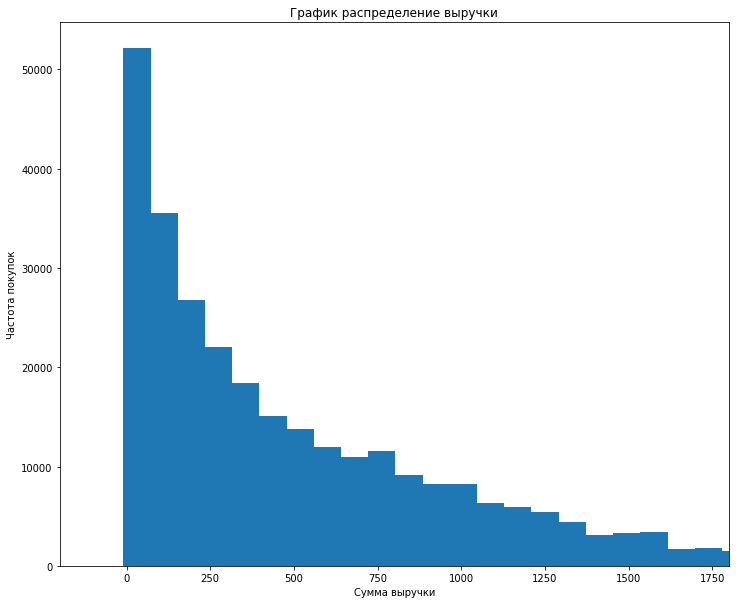

In [43]:
new_df['revenue_rub'].plot(kind='hist',
                           figsize=(12,10),
                           bins=1000,
                           title='График распределение выручки')
plt.xlim(left=-200,right=1800)
plt.xlabel('Сумма выручки')
plt.ylabel('Частота покупок')

Text(0.5, 0, 'Количество билетов')

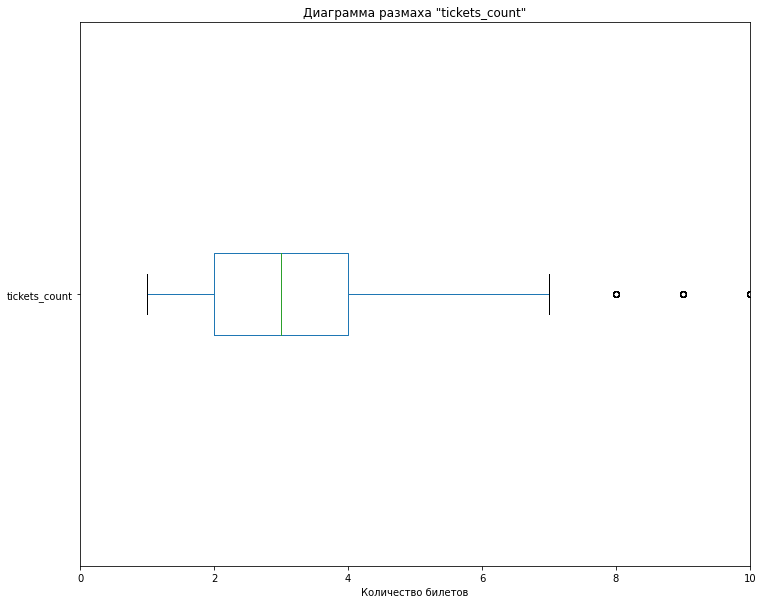

In [44]:
new_df['tickets_count'].plot(kind='box',
                           figsize=(12,10),
                           vert=False,
                           title='Диаграмма размаха "tickets_count"')
plt.xlim(left=0,right=10)
plt.xlabel('Количество билетов')

Text(0, 0.5, 'Частота покупок')

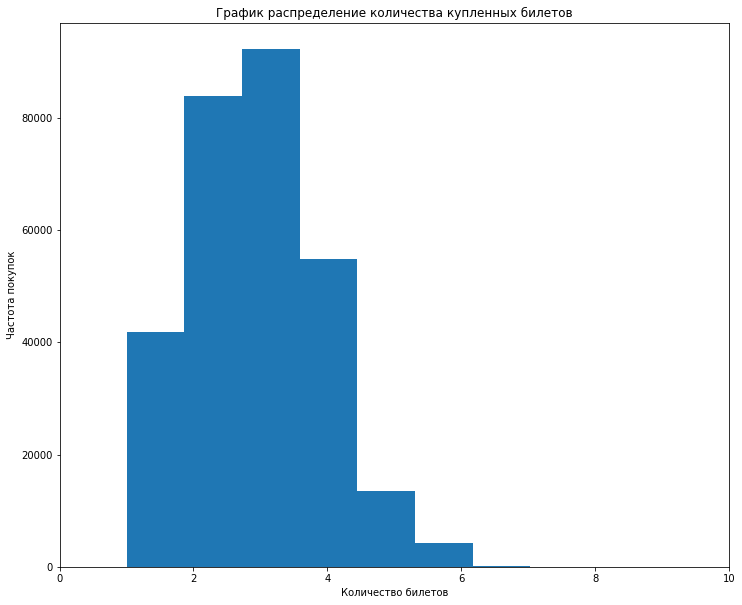

In [45]:
new_df['tickets_count'].plot(kind='hist',
                           figsize=(12,10),
                           bins=65,
                           title='График распределение количества купленных билетов')
plt.xlim(left=0,right=10)
plt.xlabel('Количество билетов')
plt.ylabel('Частота покупок')

In [46]:
new_df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,coeff_cur,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.939941,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,край билетов,глиногорск,каменевский регион,0.186972,1521.939941
1,002bf837be989ea,mobile,2543446,2024-08-20,2024-08-20 16:52:43,rub,1503.250000,4,NaN,453660,ef3f74ed-6c81-453a-9499-97d8735a0f94,концерты,билеты без проблем,каменский,боровлянский край,0.186972,1503.250000
2,008e87176c21913,mobile,1955732,2024-08-20,2024-08-20 14:34:59,rub,39.720001,2,NaN,211375,06ae0e6c-cb45-4b2c-a681-787d2c7b9a47,другое,лучшие билеты,радужнополье,широковская область,0.186972,39.720001
3,00ac6ea01bf4b8b,mobile,8614364,2024-08-20,2024-08-20 17:27:10,rub,204.759995,3,5.0,552779,146324a1-9190-4c64-bf37-f3b41ca730b3,концерты,мой билет,луговаярово,широковская область,0.186972,204.759995
4,010ff037253e138,desktop,181947,2024-08-20,2024-08-20 16:01:51,rub,1550.400024,4,NaN,508859,cb3759d1-9b7a-4e3e-b0de-24cdfd4424e5,концерты,яблоко,сосновечин,травиницкий округ,0.186972,1550.400024


In [47]:
new_df.duplicated().sum()

0

In [48]:
new_df.duplicated(subset=['user_id','device_type_canonical','order_dt','order_ts','currency_code','revenue','tickets_count','event_id','event_name','event_type_main','service_name','city_name','region_name']).sum()

40

In [49]:
new_df=new_df.drop_duplicates(subset=['user_id','device_type_canonical','order_dt','order_ts','currency_code','revenue','tickets_count','event_id','event_name','event_type_main','service_name','city_name','region_name'])

In [50]:
new_df

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,coeff_cur,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.939941,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,край билетов,глиногорск,каменевский регион,0.186972,1521.939941
1,002bf837be989ea,mobile,2543446,2024-08-20,2024-08-20 16:52:43,rub,1503.250000,4,NaN,453660,ef3f74ed-6c81-453a-9499-97d8735a0f94,концерты,билеты без проблем,каменский,боровлянский край,0.186972,1503.250000
2,008e87176c21913,mobile,1955732,2024-08-20,2024-08-20 14:34:59,rub,39.720001,2,NaN,211375,06ae0e6c-cb45-4b2c-a681-787d2c7b9a47,другое,лучшие билеты,радужнополье,широковская область,0.186972,39.720001
3,00ac6ea01bf4b8b,mobile,8614364,2024-08-20,2024-08-20 17:27:10,rub,204.759995,3,5.0,552779,146324a1-9190-4c64-bf37-f3b41ca730b3,концерты,мой билет,луговаярово,широковская область,0.186972,204.759995
4,010ff037253e138,desktop,181947,2024-08-20,2024-08-20 16:01:51,rub,1550.400024,4,NaN,508859,cb3759d1-9b7a-4e3e-b0de-24cdfd4424e5,концерты,яблоко,сосновечин,травиницкий округ,0.186972,1550.400024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290606,fe237d2cfd6e503,mobile,1160001,2024-06-10,2024-06-10 07:14:53,rub,1007.510010,3,0.0,439889,58574140-962c-49a3-af70-b773a05661a3,концерты,облачко,леснойск,чистогорская область,0.198618,1007.510010
290607,fe237d2cfd6e503,mobile,5931777,2024-06-10,2024-06-10 15:18:11,rub,58.090000,1,0.0,523552,b191f925-e0cb-43b0-a49e-8fb1563c05d0,концерты,билеты без проблем,глиногорск,каменевский регион,0.198618,58.090000
290608,fe237d2cfd6e503,mobile,3866020,2024-06-10,2024-06-10 14:35:58,rub,10.530000,1,0.0,384441,108c5bfa-b11e-47ac-a482-d0e76702508e,другое,лови билет!,озёрск,североярская область,0.198618,10.530000
290609,fe237d2cfd6e503,mobile,3141136,2024-06-10,2024-06-10 18:52:06,rub,179.529999,2,0.0,534554,3ccd92b9-5450-40a1-a7a8-5075cf90cc6a,другое,мой билет,светополье,яблоневская область,0.198618,179.529999


In [51]:
new_df=new_df[new_df['revenue']>=0]

In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290190 entries, 0 to 290610
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290190 non-null  object        
 1   device_type_canonical  290190 non-null  object        
 2   order_id               290190 non-null  int32         
 3   order_dt               290190 non-null  datetime64[ns]
 4   order_ts               290190 non-null  datetime64[ns]
 5   currency_code          290190 non-null  object        
 6   revenue                290190 non-null  float32       
 7   tickets_count          290190 non-null  int8          
 8   days_since_prev        268293 non-null  float32       
 9   event_id               290190 non-null  int32         
 10  event_name             290190 non-null  object        
 11  event_type_main        290190 non-null  object        
 12  service_name           290190 non-null  obje

In [53]:
new_df

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,coeff_cur,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.939941,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,край билетов,глиногорск,каменевский регион,0.186972,1521.939941
1,002bf837be989ea,mobile,2543446,2024-08-20,2024-08-20 16:52:43,rub,1503.250000,4,NaN,453660,ef3f74ed-6c81-453a-9499-97d8735a0f94,концерты,билеты без проблем,каменский,боровлянский край,0.186972,1503.250000
2,008e87176c21913,mobile,1955732,2024-08-20,2024-08-20 14:34:59,rub,39.720001,2,NaN,211375,06ae0e6c-cb45-4b2c-a681-787d2c7b9a47,другое,лучшие билеты,радужнополье,широковская область,0.186972,39.720001
3,00ac6ea01bf4b8b,mobile,8614364,2024-08-20,2024-08-20 17:27:10,rub,204.759995,3,5.0,552779,146324a1-9190-4c64-bf37-f3b41ca730b3,концерты,мой билет,луговаярово,широковская область,0.186972,204.759995
4,010ff037253e138,desktop,181947,2024-08-20,2024-08-20 16:01:51,rub,1550.400024,4,NaN,508859,cb3759d1-9b7a-4e3e-b0de-24cdfd4424e5,концерты,яблоко,сосновечин,травиницкий округ,0.186972,1550.400024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290606,fe237d2cfd6e503,mobile,1160001,2024-06-10,2024-06-10 07:14:53,rub,1007.510010,3,0.0,439889,58574140-962c-49a3-af70-b773a05661a3,концерты,облачко,леснойск,чистогорская область,0.198618,1007.510010
290607,fe237d2cfd6e503,mobile,5931777,2024-06-10,2024-06-10 15:18:11,rub,58.090000,1,0.0,523552,b191f925-e0cb-43b0-a49e-8fb1563c05d0,концерты,билеты без проблем,глиногорск,каменевский регион,0.198618,58.090000
290608,fe237d2cfd6e503,mobile,3866020,2024-06-10,2024-06-10 14:35:58,rub,10.530000,1,0.0,384441,108c5bfa-b11e-47ac-a482-d0e76702508e,другое,лови билет!,озёрск,североярская область,0.198618,10.530000
290609,fe237d2cfd6e503,mobile,3141136,2024-06-10,2024-06-10 18:52:06,rub,179.529999,2,0.0,534554,3ccd92b9-5450-40a1-a7a8-5075cf90cc6a,другое,мой билет,светополье,яблоневская область,0.198618,179.529999


In [54]:
new_df=new_df.sort_values(['user_id','order_ts'])

In [55]:
new_df

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,coeff_cur,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.939941,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,край билетов,глиногорск,каменевский регион,0.186972,1521.939941
1332,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.450012,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,мой билет,глиногорск,каменевский регион,0.183419,289.450012
2670,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.569946,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,за билетом!,глиногорск,каменевский регион,0.196475,1258.569946
5122,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.490000,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,лови билет!,озёрск,североярская область,0.185010,8.490000
6472,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.410034,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,билеты без проблем,родниковецк,озернинский край,0.196648,1390.410034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64253,fffcd3dde79eb2c,mobile,368591,2024-10-27,2024-10-27 17:54:52,rub,965.570007,4,0.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,другое,весь в билетах,глиногорск,каменевский регион,0.199266,965.570007
64251,fffcd3dde79eb2c,mobile,368620,2024-10-27,2024-10-27 18:00:57,rub,965.570007,4,1.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,другое,весь в билетах,глиногорск,каменевский регион,0.199266,965.570007
151636,fffcd3dde79eb2c,desktop,8473772,2024-10-30,2024-10-30 13:37:43,rub,178.949997,2,3.0,205231,74883818-57a6-494a-b162-bb0260877cbf,театр,прачечная,глиногорск,каменевский регион,0.199516,178.949997
143306,fffeeb3c120cf0b,desktop,5526067,2024-09-24,2024-09-24 10:07:42,rub,661.530029,2,NaN,454526,6f4c6a50-0106-407b-8f54-332c740b01da,стендап,билеты без проблем,ягодиновка,широковская область,0.193967,661.530029


In [56]:
new_df['days_since_prev']=new_df.groupby('user_id')['order_ts'].diff().dt.days

In [57]:
new_df

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,coeff_cur,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.939941,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,край билетов,глиногорск,каменевский регион,0.186972,1521.939941
1332,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.450012,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,мой билет,глиногорск,каменевский регион,0.183419,289.450012
2670,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.569946,4,74.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,за билетом!,глиногорск,каменевский регион,0.196475,1258.569946
5122,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.490000,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,лови билет!,озёрск,североярская область,0.185010,8.490000
6472,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.410034,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,билеты без проблем,родниковецк,озернинский край,0.196648,1390.410034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64253,fffcd3dde79eb2c,mobile,368591,2024-10-27,2024-10-27 17:54:52,rub,965.570007,4,0.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,другое,весь в билетах,глиногорск,каменевский регион,0.199266,965.570007
64251,fffcd3dde79eb2c,mobile,368620,2024-10-27,2024-10-27 18:00:57,rub,965.570007,4,0.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,другое,весь в билетах,глиногорск,каменевский регион,0.199266,965.570007
151636,fffcd3dde79eb2c,desktop,8473772,2024-10-30,2024-10-30 13:37:43,rub,178.949997,2,2.0,205231,74883818-57a6-494a-b162-bb0260877cbf,театр,прачечная,глиногорск,каменевский регион,0.199516,178.949997
143306,fffeeb3c120cf0b,desktop,5526067,2024-09-24,2024-09-24 10:07:42,rub,661.530029,2,NaN,454526,6f4c6a50-0106-407b-8f54-332c740b01da,стендап,билеты без проблем,ягодиновка,широковская область,0.193967,661.530029


In [58]:
new_df['days_since_prev'].isna().sum()

21917

In [59]:
new_df['days_since_prev']=new_df['days_since_prev'].fillna(-1)

In [60]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290190 entries, 0 to 34841
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290190 non-null  object        
 1   device_type_canonical  290190 non-null  object        
 2   order_id               290190 non-null  int32         
 3   order_dt               290190 non-null  datetime64[ns]
 4   order_ts               290190 non-null  datetime64[ns]
 5   currency_code          290190 non-null  object        
 6   revenue                290190 non-null  float32       
 7   tickets_count          290190 non-null  int8          
 8   days_since_prev        290190 non-null  float64       
 9   event_id               290190 non-null  int32         
 10  event_name             290190 non-null  object        
 11  event_type_main        290190 non-null  object        
 12  service_name           290190 non-null  objec

Чтобы привести выручку к единой валюте в датасете df_currency поле «data» приведено к типу «datettime64»,
создано поле "coeff_cur” - коэффициент для пересчета валюты.

После объединения датасетов с помощью функции convert_currency выручка приведена к единой валюте - российскому рублю. Результаты преобразования в столбце revenue_rub. 

Лишние столбцы (nominal, curs, cdx,data) были убраны с помощью метода drop()

Столбцы (event_type_main, service_name, city_name,region_name)  приведены к нижнему регистру чтобы избежать неявных дубликатов 

Был проведен анализ столбцов «revenue_rub» и «tickets_count»:

- “revenue_rub”

Есть отрицательные значения

По гистограмме видно что это похоже на правоассиметричное распределение, где больше всего значений в районе 0-350, а выбросы влияют на увеличение среднего арифметического 

Чтобы исключить выбросы из расчета поле отфильтровано по 99 процентилю.

- “tickets_count”

Среднее - 3.0 , медиана - 2,75, здесь видно что выбросы не так сильно влияют на медиану, либо их немного 
 
Здесь тоже правосимметричное распределение

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Предобработка данных <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> C задачей в целом справились, предобработку провели!
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> 
    
* Совсем не уделено внимание пропуском, этот момент никак не прокомментирован. 
    
    
* В задании это не указывается, но по умолчанию важным шагом предварительного анализа и предобработки является проверка не только на наличие полных дубликатов, но в том числе и неполных, например, если заказ пользователя задублировался в системе, был создан в нескольких экземплярах с разным `order_id` и, возможно, даже с небольшой разницей во времен. Чтобы не искажать статистические расчеты, от таких наблюдений тоже важно избавляться. Но для начала нужно проверить их начличие - для этого необходимо проверить, есть ли дубликаты на подвыборке без `order_id` и `days_since_prev`. Если обнаружим их и примем решение удалить, то потребуется также пересчитать признак с количеством дней между заказами.

    
* Стоит также обратить внимание, что у нас есть отрицательные значения выручки. Возможно, это какие-то возвраты. По-хорошему, их тоже следовало бы исключить, чтобы не завышать количество валидных транзакций на пользователя. Перед этим не забываем проверить, какой процент данных потеряем, не критично ли это.
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Было бы не лишним убедиться, что пропуски имеются только в количестве дней между заказми у первых заказов пользователей, то есть что проблемы здесь нет. 
    
    
* Количество дней между заказами по сути тоже является целочисленным признаков. Но обрати внимание, что сперва его необходимо перевести в тип `Int`, а уже потом даункастить. `Int` допускает наличие пропусков, `int` нет.
    
    
* Перевод в нижний регистр - это слишком поверхностная нормализация. Сейчас по сути мы так и не стали уверены в том, что наши категориальные признаки готовы к анализу. Стоит либо провести более глубокую нормализацию и проверить, что у нас действительно не очено много категорий, либо все же вывести на обозрения сами значения, чтобы достоверно убедиться в том, что дубликатов нет.
    
    
* Сменить тип также можно и у категориальных признаков - если признак состоит из повторяющихся категорий, то ему можно назначить тип `category
    
    
* Наш дальнейший анализ будет также касаться и количества дней между заказами, поэтому этот признак тоже важно проверить на предмет аномалий, есть ли в нем какие-то неадекватные значения, которые будут искажать наш анализ. 
    
    
* При принятии решения относительно выборосов - оставляем или выбрасываем - стоит пояснять, во-первых, откуда они могли взяться, во-вторых, ввиду причины их возникновения, полезно ли будет их учитывание для целей нашего анализа. Сейчас не ясно, почему ты решил удалить выбросы по выручке и решил не удалять по количеству билетов.
    
    
* Для удобства анализа боксплот для определенного признака можно строить над или под гистограммой, чтобы можно было сопоставлять информацию из них ([пример](https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/)). Можно даже создать пользовательскую функцию, которая будет принимать на вход признак и выводить для него сразу два типа визуализации в одном графике. Для лучшего ориентирования внутри графика стоит добавлять сетку. Также, чтобы над графиком не выводилась его техническая информация, необходимо добавлять `plt.show()`.
    

* После завершения предобработки необходимо четко зафиксировать, насколько большие потери данных мы понесли, достаточно ли их осталось для дальнейшего анализа, готовы ли мы к нему переходить.
    
    
* Пустые кодовые ячейки делают работу небрежной, лучше убрать.
    
    
* Согласно стандартам оформления кода не стоит делать строики длиной более 79 символов, это портит его читаемость, вынуждает прокручивать ячейку.
    
    
* Если выводим какие-то значения на печать, то в том числе стоит печатать и что это за значение, чтобы не приходилось разбираться в коде, чтобы это понять. 
    
    
* Напоминаю про моменты, которые уже поясняла в предыдущик комментариях: вывод неограниченного количества строк, последовательный сторителлинг.
    
    
</div>


<div class="alert alert-info">
<b>Комментарий студента: поработал с пропусками и дубликатами, пересчитал признак с количеством заказов</b>
<br>
</div>

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [61]:
new_df

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,coeff_cur,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.939941,4,-1.0,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,край билетов,глиногорск,каменевский регион,0.186972,1521.939941
1332,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.450012,2,-1.0,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,мой билет,глиногорск,каменевский регион,0.183419,289.450012
2670,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.569946,4,74.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,за билетом!,глиногорск,каменевский регион,0.196475,1258.569946
5122,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.490000,2,-1.0,387271,2f638715-8844-466c-b43f-378a627c419f,другое,лови билет!,озёрск,североярская область,0.185010,8.490000
6472,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.410034,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,билеты без проблем,родниковецк,озернинский край,0.196648,1390.410034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64253,fffcd3dde79eb2c,mobile,368591,2024-10-27,2024-10-27 17:54:52,rub,965.570007,4,0.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,другое,весь в билетах,глиногорск,каменевский регион,0.199266,965.570007
64251,fffcd3dde79eb2c,mobile,368620,2024-10-27,2024-10-27 18:00:57,rub,965.570007,4,0.0,33189,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,другое,весь в билетах,глиногорск,каменевский регион,0.199266,965.570007
151636,fffcd3dde79eb2c,desktop,8473772,2024-10-30,2024-10-30 13:37:43,rub,178.949997,2,2.0,205231,74883818-57a6-494a-b162-bb0260877cbf,театр,прачечная,глиногорск,каменевский регион,0.199516,178.949997
143306,fffeeb3c120cf0b,desktop,5526067,2024-09-24,2024-09-24 10:07:42,rub,661.530029,2,-1.0,454526,6f4c6a50-0106-407b-8f54-332c740b01da,стендап,билеты без проблем,ягодиновка,широковская область,0.193967,661.530029


In [62]:
userp_df=new_df.sort_values('order_ts').groupby('user_id').agg({'order_ts': ['min','max'],
                                 'device_type_canonical':'first',
                                 'region_name':'first',
                                 'service_name':'first',
                                 'event_type_main': 'first',
                                 'order_id':'count',
                                 'revenue_rub':'mean',
                                 'tickets_count':'mean',
                                 'days_since_prev':'mean'})

In [63]:
userp_df.head()

order_ts                     device_type_canonical  \
                                min                 max                 first   
user_id                                                                         
0002849b70a3ce2 2024-08-20 16:08:03 2024-08-20 16:08:03                mobile   
0005ca5e93f2cf4 2024-07-23 18:36:24 2024-10-06 13:56:02                mobile   
000898990054619 2024-07-13 19:40:48 2024-10-23 15:12:00                mobile   
00096d1f542ab2b 2024-08-15 16:48:48 2024-08-15 16:48:48               desktop   
000a55a418c128c 2024-09-29 19:39:12 2024-10-15 10:29:04                mobile   

                          region_name   service_name event_type_main order_id  \
                                first          first           first    count   
user_id                                                                         
0002849b70a3ce2    каменевский регион   край билетов           театр        1   
0005ca5e93f2cf4    каменевский регион      мой билет        выставки        2   
000898990054619  североярская область    лови билет!          другое        3   
00096d1f542ab2b    каменевский регион   край билетов           театр        1   
000a55a418c128c      поленовский край  лучшие билеты           театр        2   

                 revenue_rub tickets_count days_since_prev  
                        mean          mean            mean  
user_id                                                     
0002849b70a3ce2  1521.939941      4.000000       -1.000000  
0005ca5e93f2cf4   774.010010      3.000000       36.500000  
000898990054619   767.213318      2.666667       33.333333  
00096d1f542ab2b   917.830017      4.000000       -1.000000  
000a55a418c128c    61.309998      1.500000        7.000000

In [64]:
userp_df.describe()

,order_id,revenue_rub,tickets_count,days_since_prev
,count,mean,mean,mean
count,21917.000000,21917.000000,21917.000000,21917.000000
mean,13.240407,574.675842,2.756928,5.841860
std,122.361136,557.625305,0.920724,11.003946
min,1.000000,0.000000,1.000000,-1.000000
25%,1.000000,215.309998,2.000000,-1.000000
50%,2.000000,476.225006,2.767442,-0.250000
75%,5.000000,784.086365,3.125000,9.000000
max,10238.000000,16738.695312,12.000000,73.500000


In [65]:
userp_df.columns=['first_order','last_order','device_type','region','service_name_first','event_type_first',
                  'order_count','revenue_rub_mean','tickets_count_mean','days_since_prev_mean']

In [66]:
userp_df.head()

,first_order,last_order,device_type,region,service_name_first,event_type_first,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean
user_id,,,,,,,,,,
0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,каменевский регион,край билетов,театр,1,1521.939941,4.000000,-1.000000
0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,каменевский регион,мой билет,выставки,2,774.010010,3.000000,36.500000
000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,североярская область,лови билет!,другое,3,767.213318,2.666667,33.333333
00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,каменевский регион,край билетов,театр,1,917.830017,4.000000,-1.000000
000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,поленовский край,лучшие билеты,театр,2,61.309998,1.500000,7.000000


In [67]:
def is_twof(row):
    if row['order_count']>=2:
        return 1
    else:
        return 0

In [68]:
userp_df['is_two']=userp_df.apply(is_twof,axis=1)

In [69]:
def is_fivef(row):
    if row['order_count']>=5:
        return 1
    else:
        return 0

In [70]:
userp_df['is_five']=userp_df.apply(is_fivef,axis=1)

In [71]:
userp_df.head()

,first_order,last_order,device_type,region,service_name_first,event_type_first,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean,is_two,is_five
user_id,,,,,,,,,,,,
0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,каменевский регион,край билетов,театр,1,1521.939941,4.000000,-1.000000,0,0
0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,каменевский регион,мой билет,выставки,2,774.010010,3.000000,36.500000,1,0
000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,североярская область,лови билет!,другое,3,767.213318,2.666667,33.333333,1,0
00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,каменевский регион,край билетов,театр,1,917.830017,4.000000,-1.000000,0,0
000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,поленовский край,лучшие билеты,театр,2,61.309998,1.500000,7.000000,1,0


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Создание профиля пользователя <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 
    
* Профиль составлен корректно! 
    
    
* Хорошо, что, ввиду использования агрегата `first`, не забываешь про сортировку заказов по времени!
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Операции сравнения в качестве результата возвращают `True` и `False`, но при переводе в числовой тип данные значения соответсвуют единице и нулю, поэтому здесь можно было обойтись без цикличного `apply` и кастомных функций.
    
    
* Также есть довольно удобный метод [assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), позволяющий дополнять таблицу новыми рассчитанными столбцами.
    
    Тогда создание всего профиля можно будет записать красивым и удобным по структуре кодом.
    
    <details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>

    ```python
profiles = (df
            # В начале сортируем данные по дате совершения заказа, что найти первые признаки:
            .sort_values(by='order_ts')
            # Затем группируем по номеру пользователя и агрегируем данные:
            .groupby('user_id')
            .agg(
                # Находим первую и последнюю даты заказа:
                first_order_dt=('order_dt','min'),
                last_order_dt=('order_dt','max'),
                # Находим устройства, регион, название билетного партнера и жанр мероприятия первого заказа:
                first_device=('device_type_canonical','first'),
                first_region_name=('region_name','first'),
                first_service_name=('service_name','first'),
                first_event_type=('event_type_main','first'),
                # Подсчитваем количество заказов:
                total_orders=('order_id','nunique'),
                # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов:
                avg_revenue_rub=('revenue_rub','mean'),
                avg_tickets_count=('tickets_count','mean'),
                # Считаем среднее количество дней между покупками:
                avg_days_since_prev=('days_since_prev','mean')
            )
            # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
            .assign(
                is_two = lambda x: x['total_orders'] >= 2,
                is_five = lambda x: x['total_orders'] >= 5
            )
            .reset_index()
)
```
</details>

    
* Напоминаю про моменты, которые уже поясняла в предыдущик комментариях: вывод неограниченного количества строк.

</div>

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [72]:
userpr_df=userp_df.reset_index()

In [73]:
userpr_df.head()

,user_id,first_order,last_order,device_type,region,service_name_first,event_type_first,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean,is_two,is_five
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,каменевский регион,край билетов,театр,1,1521.939941,4.000000,-1.000000,0,0
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,каменевский регион,мой билет,выставки,2,774.010010,3.000000,36.500000,1,0
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,североярская область,лови билет!,другое,3,767.213318,2.666667,33.333333,1,0
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,каменевский регион,край билетов,театр,1,917.830017,4.000000,-1.000000,0,0
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,поленовский край,лучшие билеты,театр,2,61.309998,1.500000,7.000000,1,0


In [74]:
userpr_df['user_id'].count()

21917

In [75]:
userpr_df['revenue_rub_mean'].mean()

574.67584

In [76]:
two_orders=userpr_df[userpr_df['order_count']>=2]

In [77]:
two_orders['user_id'].count()/userpr_df['user_id'].count()

0.618150294292102

In [78]:
five_orders=userpr_df[userpr_df['order_count']>=5]

In [79]:
five_orders['user_id'].count()/userpr_df['user_id'].count()

0.29160012775471095

In [80]:
userpr_df['order_count'].describe()

count    21917.000000
mean        13.240407
std        122.361136
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      10238.000000
Name: order_count, dtype: float64

In [81]:
userpr_df['order_count'].median()

2.0

In [82]:
userpr_df['tickets_count_mean'].median()

2.7674418604651163

Text(0.5, 0, 'Количество заказов')

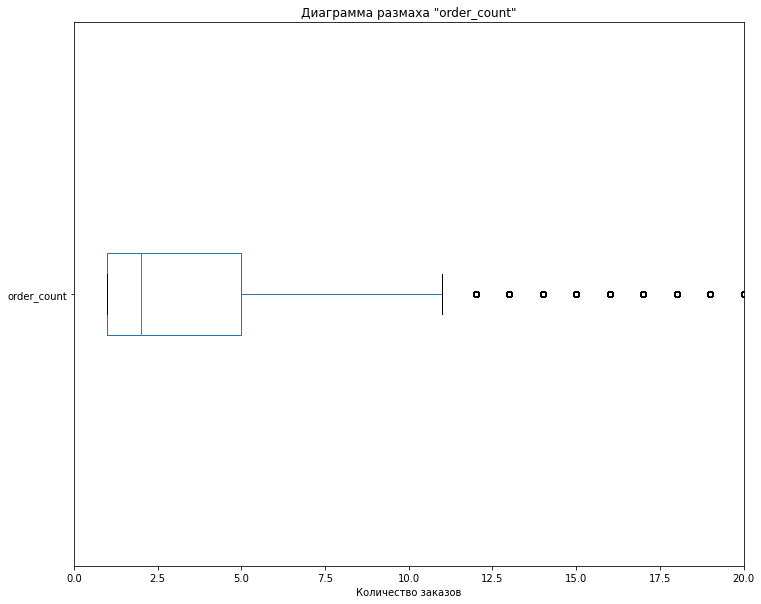

In [83]:
userpr_df['order_count'].plot(kind='box',
                           figsize=(12,10),
                           vert=False,
                           title='Диаграмма размаха "order_count"')
plt.xlim(left=0,right=20)
plt.xlabel('Количество заказов')

In [84]:
order_count87=np.percentile(userpr_df['order_count'],87)

In [85]:
order_count87

11.0

In [86]:
userpr_df['tickets_count_mean'].describe()

count    21917.000000
mean         2.756928
std          0.920724
min          1.000000
25%          2.000000
50%          2.767442
75%          3.125000
max         12.000000
Name: tickets_count_mean, dtype: float64

Text(0.5, 0, 'Количество билетов')

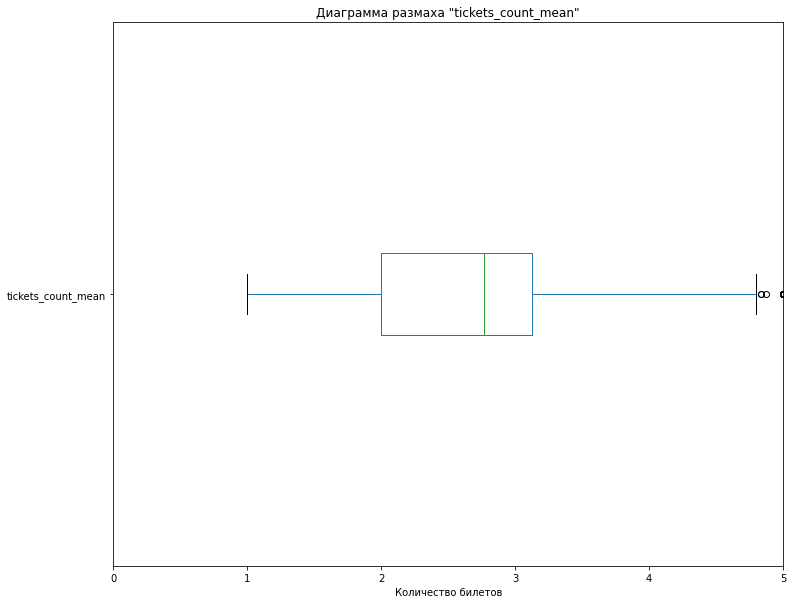

In [87]:
userpr_df['tickets_count_mean'].plot(kind='box',
                           figsize=(12,10),
                           vert=False,
                           title='Диаграмма размаха "tickets_count_mean"')
plt.xlim(left=0,right=5)
plt.xlabel('Количество билетов')

In [88]:
tickets_count_mean96=np.percentile(userpr_df['tickets_count_mean'],96)

In [89]:
tickets_count_mean96

4.5

In [90]:
userpr_df['days_since_prev_mean'].describe()

count    21917.000000
mean         5.841860
std         11.003946
min         -1.000000
25%         -1.000000
50%         -0.250000
75%          9.000000
max         73.500000
Name: days_since_prev_mean, dtype: float64

Text(0.5, 0, 'Количество дней')

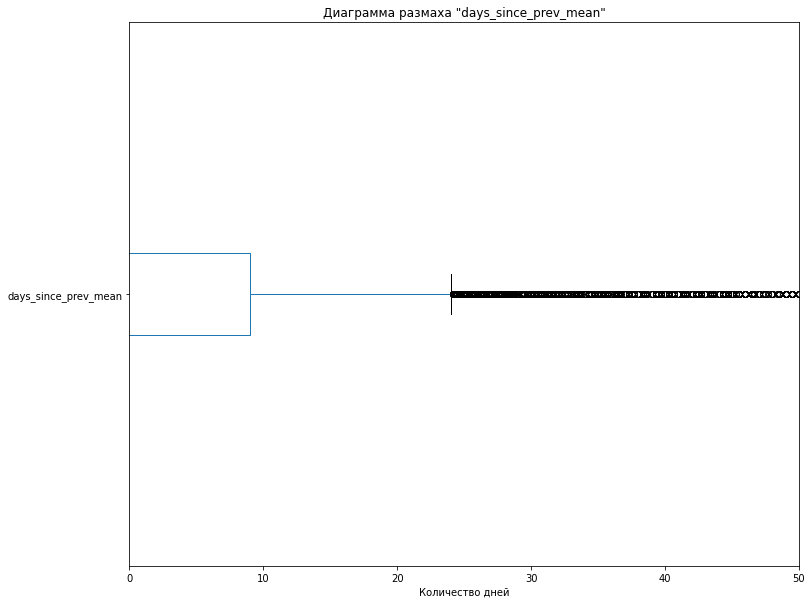

In [91]:
userpr_df['days_since_prev_mean'].plot(kind='box',
                           figsize=(12,10),
                           vert=False,
                           title='Диаграмма размаха "days_since_prev_mean"')
plt.xlim(left=0,right=50)
plt.xlabel('Количество дней')

In [92]:
filt_df=userpr_df[(userpr_df['order_count']<=order_count87)&(userpr_df['tickets_count_mean']<=tickets_count_mean96)]

In [93]:
(userpr_df['user_id'].count())-(filt_df['user_id'].count())

3527

In [94]:
filt_df.describe()

,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean,is_two,is_five
count,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000
mean,2.834203,561.029724,2.657372,6.265686,0.575150,0.194508
std,2.433738,552.446411,0.840162,11.827982,0.494334,0.395832
min,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,1.000000,189.150002,2.000000,-1.000000,0.000000,0.000000
50%,2.000000,448.415009,2.714286,-0.500000,1.000000,0.000000
75%,4.000000,796.534454,3.000000,10.977273,1.000000,0.000000
max,11.000000,16738.695312,4.500000,73.500000,1.000000,1.000000


Общее число пользователей в выборке - 21848, средняя выручка - 532, доля пользователей совершивших 2 и более заказа - 62%, 5 и более заказов - 29%.

В данных о количестве заказов order_count пристутствуют аномальные значения, которые сильно влияют на среднее и стандартное отклонение.
Исходя из диаграммы размаха для order_count решено отфильтровать данные по 87-му процентилю, чтобы исключить аномальные значения.

В данных о среднем количестве билетов также присутствуют аномальные значения, которые отфильтрованы по 96-му процентилю также исходя из диаграммы размаха.

Общий объем отфильтрованных данных составил - 3616 строк.

Отфильтрованный датасет содержит 18232 строк.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ пользовательских профилей <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здесь тоже все супер, выполнены все необходимые шаги!
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Еще раз обращаю внимание, что если выводим какие-то значения на печать, то в том числе стоит печатать и что это за значение, чтобы не приходилось разбираться в коде, чтобы это понять. Для красоты и удобства дробные значения при этом лучше округлять до знаков, которые могут представлять для нас интерес. 
    

* Возвращаемость на второй и на пятый заказ можно посчитать через функцию `mean`, поскольку наши поля бинарные, как раз получим долю единичек.

    
* Чтобы сильно не растягивать код на множество ячеек схожие по целями и подходам шаги лучше выполнять одной ячейкой. Например, было бы можно объединить первичный подсчет статистик. Стат распределение по числовым признакам тожеможно было бы вывести разом одним `describe`. 

    
* Если ты обрезаешь график, то необходимо указать это в заголовке, чтобы у читателя не складывалось ложное представление, что это все распределение целиком.
    
    
* Опять же, совершенно неясно, каким образом принималось решение относительно фильтрации? Почему вдруг были выбраны такие нетипичные значения перцентилей для отбрасывания? Разве среднее количество билетов выглядело аномально?
    
    
* Было бы не лишним также проверить, насколько изменились показатели возвращаемости и средней выручки. 
    
    
* Стоит отобратить не только количество потерянных строк, но также сколько фактически их было до, и сколько стало после обработки. Изменения стоит также выражать в процентах, чтобы четко было выидно, насколько они существенны.
    
    
* Напоминаю про моменты, которые уже поясняла в предыдущик комментариях: последовательный сторителлинг, пустые ячейки.

</div>


---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [95]:
filt_df.head()

,user_id,first_order,last_order,device_type,region,service_name_first,event_type_first,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean,is_two,is_five
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,каменевский регион,край билетов,театр,1,1521.939941,4.000000,-1.000000,0,0
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,каменевский регион,мой билет,выставки,2,774.010010,3.000000,36.500000,1,0
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,североярская область,лови билет!,другое,3,767.213318,2.666667,33.333333,1,0
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,каменевский регион,край билетов,театр,1,917.830017,4.000000,-1.000000,0,0
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,поленовский край,лучшие билеты,театр,2,61.309998,1.500000,7.000000,1,0


In [96]:
event_type_gr=filt_df.groupby('event_type_first')['user_id'].count().sort_values(ascending=False)

In [97]:
event_type_gr/filt_df['user_id'].count()

event_type_first
концерты    0.446819
другое      0.246601
театр       0.194508
стендап     0.051441
спорт       0.036324
выставки    0.019630
ёлки        0.004676
Name: user_id, dtype: float64

In [98]:
device_type_gr=filt_df.groupby('device_type')['user_id'].count().sort_values(ascending=False)

In [99]:
device_type_gr/filt_df['user_id'].count()

device_type
mobile     0.833388
desktop    0.166612
Name: user_id, dtype: float64

In [100]:
region_gr=filt_df.groupby('region')['user_id'].count().sort_values(ascending=False)

In [101]:
region_gr

region
каменевский регион          6000
североярская область        3116
широковская область         1050
озернинский край             590
малиновоярский округ         471
                            ... 
залесский край                 2
верхозёрский край              1
светолесский край              1
сосноводолинская область       1
яснопольский округ             1
Name: user_id, Length: 81, dtype: int64

In [102]:
region_gr/filt_df['user_id'].count()

region
каменевский регион          0.326264
североярская область        0.169440
широковская область         0.057096
озернинский край            0.032083
малиновоярский округ        0.025612
                              ...   
залесский край              0.000109
верхозёрский край           0.000054
светолесский край           0.000054
сосноводолинская область    0.000054
яснопольский округ          0.000054
Name: user_id, Length: 81, dtype: float64

In [103]:
service_name_gr=filt_df.groupby('service_name_first')['user_id'].count().sort_values(ascending=False)

In [104]:
service_name_gr/filt_df['user_id'].count()

service_name_first
билеты без проблем        0.236868
мой билет                 0.139043
лови билет!               0.130071
билеты в руки             0.116259
облачко                   0.103480
весь в билетах            0.060087
лучшие билеты             0.055139
прачечная                 0.025122
край билетов              0.020500
дом культуры              0.016096
яблоко                    0.014954
тебе билет!               0.014410
городской дом культуры    0.009897
за билетом!               0.009625
мир касс                  0.009516
show_ticket               0.007776
быстробилет               0.007722
выступления.ру            0.004459
восьмёрка                 0.004024
росбилет                  0.002556
быстрый кассир            0.002229
crazy ticket!             0.001849
радио ticket              0.001686
телебилет                 0.001414
реестр                    0.001305
цвет и билет              0.001033
шоу начинается!           0.000924
карандашру                0.000707
к

Почти у половины пользователей первым мероприятием идет «Концерт», первый заказ у 83% пользователей с мобильного телефона, треть пользователей из Каменевского региона, сделавшие заказ из у билетного оператора «билеты без проблем»(24% пользователей)

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [105]:
filt_df.head()

,user_id,first_order,last_order,device_type,region,service_name_first,event_type_first,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean,is_two,is_five
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,каменевский регион,край билетов,театр,1,1521.939941,4.000000,-1.000000,0,0
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,каменевский регион,мой билет,выставки,2,774.010010,3.000000,36.500000,1,0
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,североярская область,лови билет!,другое,3,767.213318,2.666667,33.333333,1,0
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,каменевский регион,край билетов,театр,1,917.830017,4.000000,-1.000000,0,0
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,поленовский край,лучшие билеты,театр,2,61.309998,1.500000,7.000000,1,0


In [106]:
event_share=filt_df.groupby(['event_type_first','is_two'])['user_id'].count()

In [107]:
event_share

event_type_first  is_two
выставки          0          143
                  1          218
другое            0         1987
                  1         2548
концерты          0         3489
                  1         4728
спорт             0          311
                  1          357
стендап           0          403
                  1          543
театр             0         1442
                  1         2135
ёлки              0           38
                  1           48
Name: user_id, dtype: int64

In [108]:
event_plot=(event_share/event_type_gr).unstack(fill_value=0)

In [109]:
event_plot

is_two,0,1
event_type_first,,
выставки,0.396122,0.603878
другое,0.438148,0.561852
концерты,0.424608,0.575392
спорт,0.465569,0.534431
стендап,0.426004,0.573996
театр,0.403131,0.596869
ёлки,0.441860,0.558140


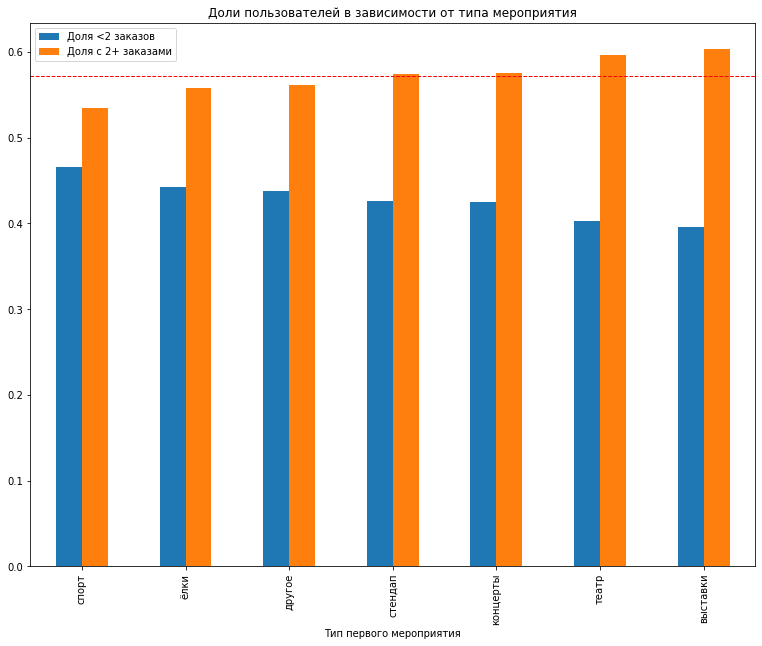

In [110]:
event_plot.sort_values(by=1).plot(kind='bar',
                figsize=(13,10),
                title='Доли пользователей в зависимости от типа мероприятия',
                xlabel='Тип первого мероприятия')
plt.legend(['Доля <2 заказов','Доля с 2+ заказами'])

mean_0=event_plot[1].mean()
plt.axhline(y=mean_0,color='red',linestyle='--', linewidth=1,)


In [111]:
event_type_gr

event_type_first
концерты    8217
другое      4535
театр       3577
стендап      946
спорт        668
выставки     361
ёлки          86
Name: user_id, dtype: int64

In [112]:
device_share=filt_df.groupby(['device_type','is_two'])['user_id'].count()

In [113]:
device_plot=(device_share/device_type_gr).unstack(fill_value=0)

In [114]:
device_plot

is_two,0,1
device_type,,
desktop,0.405026,0.594974
mobile,0.428814,0.571186


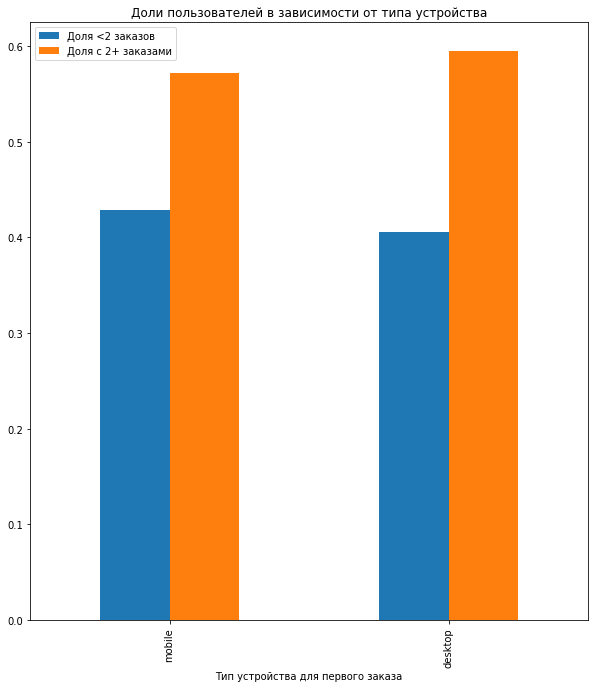

In [115]:
device_plot.sort_values(by=1).plot(kind='bar',
                figsize=(10,11),
                title='Доли пользователей в зависимости от типа устройства',
                xlabel='Тип устройства для первого заказа')
plt.legend(['Доля <2 заказов','Доля с 2+ заказами'])

In [116]:
device_type_gr

device_type
mobile     15326
desktop     3064
Name: user_id, dtype: int64

In [117]:
region_share=filt_df.groupby(['region','is_two'])['user_id'].count()

In [118]:
region_share

region                is_two
белоярская область    0           7
                      1           8
берестовский округ    0           8
                      1          12
берёзовская область   0          34
                               ... 
яблоневская область   0         156
                      1         201
ягодиновская область  0          22
                      1          36
яснопольский округ    0           1
Name: user_id, Length: 156, dtype: int64

In [119]:
region_plot=(region_share/region_gr).unstack(fill_value=0)

In [120]:
region_plot_sorted=region_plot.loc[region_gr.index]

In [121]:
region_plot_sorted

is_two,0,1
region,,
каменевский регион,0.415333,0.584667
североярская область,0.399872,0.600128
широковская область,0.379048,0.620952
озернинский край,0.477966,0.522034
малиновоярский округ,0.475584,0.524416
...,...,...
залесский край,0.500000,0.500000
верхозёрский край,0.000000,1.000000
светолесский край,1.000000,0.000000


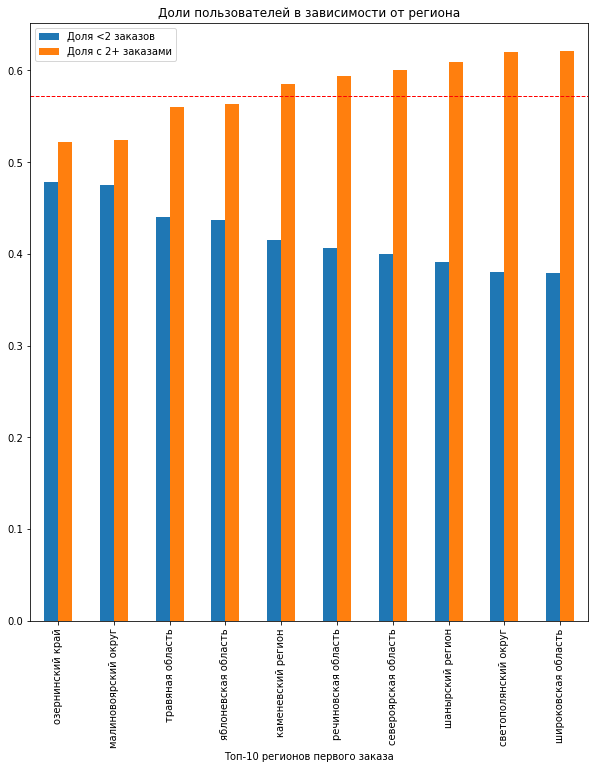

In [122]:
region_plot_sorted.head(10).sort_values(by=1).plot(kind='bar',
                                 figsize=(10,11),
                                 title='Доли пользователей в зависимости от региона',
                                 xlabel='Топ-10 регионов первого заказа')
plt.legend(['Доля <2 заказов','Доля с 2+ заказами'])

mean_r=region_plot_sorted[1].mean()
plt.axhline(y=mean_0,color='red',linestyle='--', linewidth=1,)

In [123]:
share_scatter=pd.DataFrame(region_share)

In [124]:
scatter_reset=share_scatter.reset_index()

In [125]:
use_it=scatter_reset[scatter_reset['is_two']==1]

In [126]:
scatter=pd.DataFrame(region_gr)

In [127]:
sc=scatter.reset_index()

In [128]:
sc2=sc.merge(use_it,on='region')

In [129]:
sc2

,region,user_id_x,is_two,user_id_y
0,каменевский регион,6000,1,3508
1,североярская область,3116,1,1870
2,широковская область,1050,1,652
3,озернинский край,590,1,308
4,малиновоярский округ,471,1,247
...,...,...,...,...
71,крутоводский регион,3,1,1
72,верховинская область,2,1,1
73,тихогорская область,2,1,1
74,залесский край,2,1,1


Text(0, 0.5, 'Совершившие 2+ заказа')

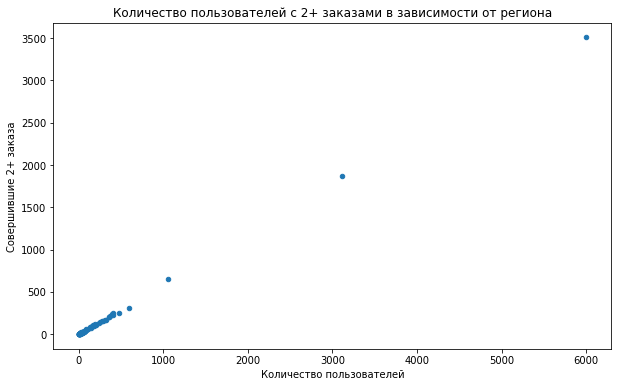

In [130]:
sc2.plot(kind='scatter',
         x='user_id_x',
         y='user_id_y',
         figsize=(10,6))
plt.title('Количество пользователей с 2+ заказами в зависимости от региона')
plt.xlabel('Количество пользователей')
plt.ylabel('Совершившие 2+ заказа')

In [131]:
region_gr.head(10)

region
каменевский регион      6000
североярская область    3116
широковская область     1050
озернинский край         590
малиновоярский округ     471
травяная область         409
шанырский регион         402
светополянский округ     389
речиновская область      369
яблоневская область      357
Name: user_id, dtype: int64

In [132]:
service_share=filt_df.groupby(['service_name_first','is_two'])['user_id'].count()

In [133]:
service_plot=(service_share/service_name_gr).unstack(fill_value=0)

In [134]:
service_plot_sorted=service_plot.loc[service_name_gr.index]

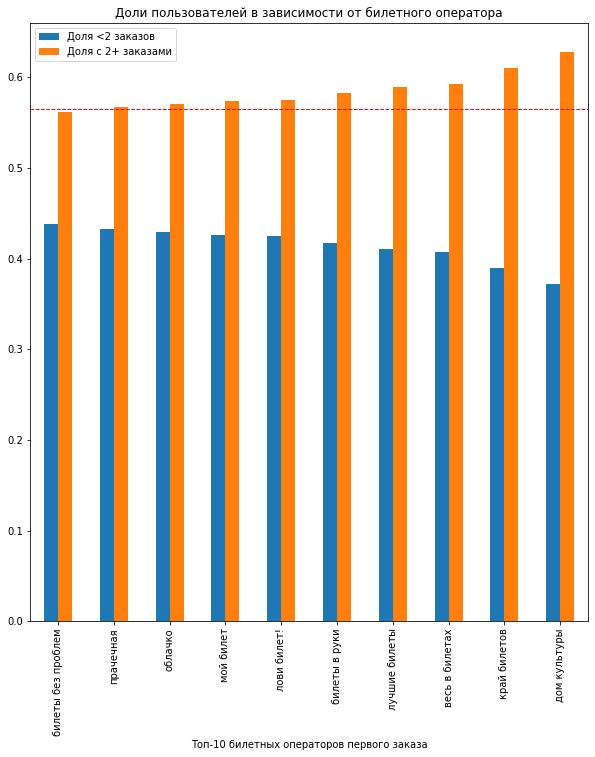

In [135]:
service_plot_sorted.head(10).sort_values(by=1).plot(kind='bar',
                                 figsize=(10,11),
                                 title='Доли пользователей в зависимости от билетного оператора',
                                 xlabel='Топ-10 билетных операторов первого заказа')
plt.legend(['Доля <2 заказов','Доля с 2+ заказами'])

mean_s=service_plot_sorted[1].mean()
plt.axhline(y=mean_s,color='red',linestyle='--', linewidth=1,)

In [136]:
service_name_gr.head(10)

service_name_first
билеты без проблем    4356
мой билет             2557
лови билет!           2392
билеты в руки         2138
облачко               1903
весь в билетах        1105
лучшие билеты         1014
прачечная              462
край билетов           377
дом культуры           296
Name: user_id, dtype: int64


Сегменты 'Концерты', 'другое' и 'театр' чаще всего возвращаются на платформу. 
 
По типу устройства заказы с mobile-устройств чаще возвращаются за 2-м заказом.

По региону наиболее активные области это: 
-Каменевский регион 
-Североярская область 
-Широковская область  


Наиболее активные пользователи у билетных операторов:
-Билеты без проблем 
-Край билетов 
-Мой билет 
-Лови билет!


По типу мероприятия успешные точки входа наблюдаются незначительно у типа «выставки» и «театр»
По региону успешные точки входа тоже незначительны и наблюдается у широковской области и светополянского округа, но там маленькое население (1033 и 381)
По типу билетов успешные точки входа у «Дом культуры» и «край билетов», но у них незначительное количество пользователей

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

Гипотеза 1 

У пользователей, совершивших заказ на концерты % оформивших 2 заказ выше(57%), чем у тех, кто купил билеты на спорт (53%), поэтому первые с большей вероятностью совершат повторный заказ 


Гипотеза 2 

В маленьких регионах доля повторных заказов выше, но они нестабильные, так как там 1 дополнительный пользователь имеет больший вес нежели в больших регионах. Гипотеза подтверждается, в популярных регионах выше доля повторных заказов.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ сегментов пользователей <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По результатам все верно!

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Возвращаемость, опять же, можно считать через `mean`. Расчет всех необходимых показателей, опять же, было бы лучше провести в рамках одной группировки, чтобы все нужные нам показатели находились рядышком, и код не растягивался на множество ячеек. Можно даже сразу объединить расчеты для первой и второй подзадачи, а потом уже переходить к визуализации и анализу.
    
    
* Сейчас ты выполняешь большое количество однотипных действий. Чтобы немного облегчить код и уменьшить влияние человеческого фактора, стоит создать какую-нибудь пользовательскую функцию или зациклить выполнение определенного шаблона действий.
    
    
* В случае вывода неполного набора сегментов стоит указать, какой процент от выборки они составляют, чтобы было понимание, насколько большая часть данных осталась за пределами нашего обзора.
    

* На графиках для каждого сегмента лучше отобразить только одну из долей. Поскольку у нас каждый сегмент подразедяляется только на две подгруппы, они являются дополняющими друг для друга, если мы отображаем обе, график уже становится сложнее, но дополнительной инфомативности это не дает.
    
    
* Ввиду различия размерности групп для отображения средней линии на графике лучше считать общую возвращаемость по выборке, а не как среднее среди групповых возвращаемостей.
 

* В выводах по анализу сегментов было бы неплохо также попробовать предположить, почему мы могли получить то или иное распределение по сегментам и определенный уровень возвращаемости, почему показатели оказались именно такими. Это может быть полезно в плане развития стратегий по привлечению новых пользователей. 

</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> С выводами относительно гипотезы по регионам не соглашусь. Важно иметь в виду, что в менее популярных группах 1 дополнительный пользователь имеет больший вес, а потому показатель возвращаемости у таких категорий больше подвержен колебаниям, менее стабилен. Чтобы сделать более осознаный вывод, можно, к примеру, построить скаттерплот с отображением размера региона и возвращаемости в нем, тогда будет видно всю картину в данных и можно будет сказать, что судя по относительно крупным регионам, в стабильности которых мы более менее уверены, такой зависимости не наблюдается.
    
Но вообще, чтобы наверняка убедиться в том, что возвращаемость в неполпуляных группах ниже, и это не случайное колебание, следует провести статистический тест, оценить значимость различий. Это будет изучаться в дальнейшем на курсе.
    
</div>

<div class="alert alert-info">
<b>Комментарий студента: построил скаттерплот и отредактировал вывод</b>
<br>
</div>

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


In [137]:
filt_df.head()

,user_id,first_order,last_order,device_type,region,service_name_first,event_type_first,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean,is_two,is_five
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,каменевский регион,край билетов,театр,1,1521.939941,4.000000,-1.000000,0,0
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,каменевский регион,мой билет,выставки,2,774.010010,3.000000,36.500000,1,0
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,североярская область,лови билет!,другое,3,767.213318,2.666667,33.333333,1,0
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,каменевский регион,край билетов,театр,1,917.830017,4.000000,-1.000000,0,0
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,поленовский край,лучшие билеты,театр,2,61.309998,1.500000,7.000000,1,0


In [138]:
one_order=filt_df[filt_df['is_two']==0]

In [139]:
two_orders=filt_df[filt_df['is_two']==1]

Text(0.5, 0, 'Средняя выручка')

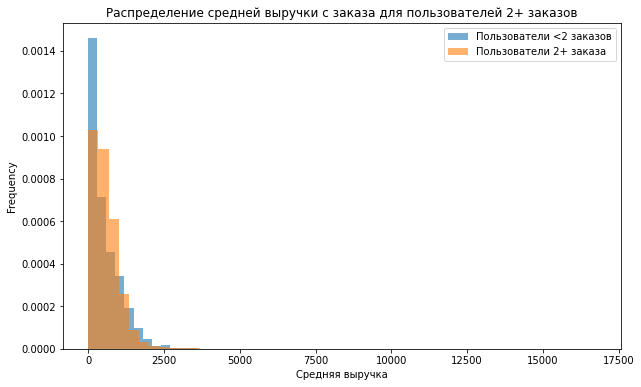

In [140]:
one_order['revenue_rub_mean'].plot(kind='hist',
                                   bins=50, 
                                   figsize=(10,6),
                                   alpha=0.6,
                                   density=True,
                                   title='Распределение средней выручки с заказа для пользователей <2 заказов')
two_orders['revenue_rub_mean'].plot(kind='hist',
                                   bins=50, 
                                   figsize=(10,6),
                                   alpha=0.6,
                                   density=True,
                                   title='Распределение средней выручки с заказа для пользователей 2+ заказов')
plt.legend(['Пользователи <2 заказов','Пользователи 2+ заказа'])
plt.xlabel('Средняя выручка')

Первая группа в основном покупает недорогие билеты, много аномалий и выбросов.

У второй группы график стабильнее, разнообразные мероприятия, билеты подороже и выбросов меньше.

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


In [141]:
four_order=filt_df[(filt_df['order_count']>=2)&(filt_df['order_count']<=4)]

In [142]:
five_orders=filt_df[filt_df['is_five']==1]

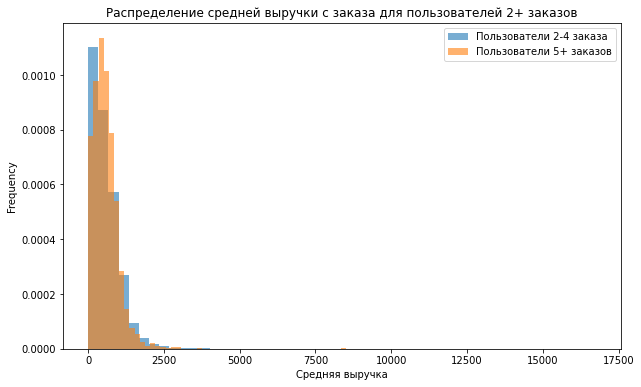

In [184]:
four_order['revenue_rub_mean'].plot(kind='hist',
                                   bins=50, 
                                   figsize=(10,6),
                                   alpha=0.6,
                                   density=True,
                                   title='Распределение средней выручки с заказа для пользователей 2-4 заказа')
five_orders['revenue_rub_mean'].plot(kind='hist',
                                   bins=50, 
                                   figsize=(10,6),
                                   alpha=0.6,
                                   density=True,
                                   title='Распределение средней выручки с заказа для пользователей 2+ заказов')
plt.legend(['Пользователи 2-4 заказа','Пользователи 5+ заказов'])
plt.xlabel('Средняя выручка')
plt.show()

У группы (2-4) средняя выручка от 0 до 700

Значение средней выручки у группы (5+) смещена в большую сторону около от 300 до 1000

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи средней выручки и числа заказов <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 
    
* С этой задачей тоже справились! 
    
    
* Плюсик за грамотное оформление графиков - заголовок, подписи осей, легенда, поправка на размер выборки (`density`). Было бы неплохо еще добавить сетку.
 
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>  
   
* Чтобы удобно было сопоставлять доли пользователей по диапазонам цен, можно настроить единый размер бинов (`bins = 50` фиксирует количество бинов, но размер между сегментами будет отличаться, поскольку диапазон значений у них разный). Для этого в `bins` можно передать границы для формирования бинов с шагом: `bins = range(min_value, max_value+1, 50)`, максимальное и минимальное значения при этом определяем на всей выборке, а не отдельно для каждого сегмента.
    
    
* В выводах было бы не лишним выделить сегменты концентрации - резюмировать информацию с графиков в более понятные лаконичные диапазоны, при этом в том числе обратить внимание на хвосты. А также попробовать подумать, что для нас могут значить данные результаты, почему они могли получиться именно такими, что это говорит о клиентах.
    
</div>

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

In [144]:
filt_df.describe()

,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean,is_two,is_five
count,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000,18390.000000
mean,2.834203,561.029724,2.657372,6.265686,0.575150,0.194508
std,2.433738,552.446411,0.840162,11.827982,0.494334,0.395832
min,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,1.000000,189.150002,2.000000,-1.000000,0.000000,0.000000
50%,2.000000,448.415009,2.714286,-0.500000,1.000000,0.000000
75%,4.000000,796.534454,3.000000,10.977273,1.000000,0.000000
max,11.000000,16738.695312,4.500000,73.500000,1.000000,1.000000


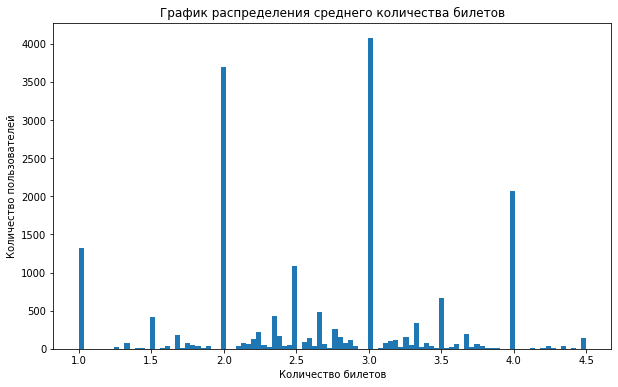

In [183]:
filt_df['tickets_count_mean'].plot(kind='hist',
                                   bins=100,
                                   figsize=(10,6),
                                   title='График распределения среднего количества билетов')
plt.xlabel('Количество билетов')
plt.ylabel('Количество пользователей')
plt.show()

In [146]:
ticket_1=filt_df[filt_df['tickets_count_mean']<2]

In [147]:
ticket1_count=ticket_1['user_id'].count()

In [148]:
ticket1_count

2338

In [149]:
ticket1_share=ticket_1.groupby('is_two')['user_id'].count()

In [150]:
ticket1_share/ticket1_count

is_two
0    0.5
1    0.5
Name: user_id, dtype: float64

In [151]:
ticket_23=filt_df[(filt_df['tickets_count_mean']>=2)&(filt_df['tickets_count_mean']<3)]

In [152]:
ticket23_count=ticket_23['user_id'].count()

In [153]:
ticket23_count

7529

In [154]:
ticket23_share=ticket_23.groupby('is_two')['user_id'].count()

In [155]:
ticket23_share/ticket23_count

is_two
0    0.331518
1    0.668482
Name: user_id, dtype: float64

In [156]:
ticket_35=filt_df[(filt_df['tickets_count_mean']>=3)&(filt_df['tickets_count_mean']<5)]

In [157]:
ticket35_count=ticket_35['user_id'].count()

In [158]:
ticket35_count

8523

In [159]:
ticket35_share=ticket_35.groupby('is_two')['user_id'].count()

In [160]:
ticket35_share/ticket35_count

is_two
0    0.486683
1    0.513317
Name: user_id, dtype: float64

Пользователи чаще всего покупают одно и то же количество билетов , поэтому скопления вокруг целых средних чисел и распределение неравномерно 

Сегмент от 2 до 3 билетов показал 67% повторных покупок , что на 17% выше среднего

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи количества билетов в заказе и возвращаемости <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здесь в целом тоже все корректно посчитано!

</div>
    
<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Чтобы работа выглядела более аккуратной и читаемой, не забывай сопровожадть графики всеми необходимыми подписями (заголовок, оси, легенда при наличии разлмчных цветов и маркеров) - так, чтобы график мог существовать в отрыве от кода и пояснений, и все еще было понятно, как его читать. Чтобы над графиком не выводилась его техническая информация, необходимо добавлять `plt.show()`.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Для сегментации данных есть довольно удобный метод [сut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Можно задать границы интервалов и последовательный список наименований сегментов и они автоматически сформируются. Необходимо только правильно настроить параметр `right`, который по умолчанию имеет значение `True`, и параметр `include_lowest`, по умолчанию имеющий значение `False`, чтобы у нас включались и исключались нужные нам границы интервала.
    

* Возвращаемость при этом, опять же, можно было бы посчитать, как среднее.
 
    
* В выводах было бы неплохо предположить, что это за группы у нас сформировались (что за типы клиентов), и почему получились именно такие результаты по возвращаемости. Опять же, это может быть полезно в плане развития стратегий по привлечению новых пользователей.

</div>

<div class="alert alert-info">
<b>Комментарий студента: сделал</b>
<br>
</div>

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [161]:
day_df=filt_df.copy()

In [162]:
day_df['day_of_week']=day_df['first_order'].dt.dayofweek

In [163]:
day_df.head(5)

,user_id,first_order,last_order,device_type,region,service_name_first,event_type_first,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean,is_two,is_five,day_of_week
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,каменевский регион,край билетов,театр,1,1521.939941,4.000000,-1.000000,0,0,1
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,каменевский регион,мой билет,выставки,2,774.010010,3.000000,36.500000,1,0,1
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,североярская область,лови билет!,другое,3,767.213318,2.666667,33.333333,1,0,5
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,каменевский регион,край билетов,театр,1,917.830017,4.000000,-1.000000,0,0,3
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,поленовский край,лучшие билеты,театр,2,61.309998,1.500000,7.000000,1,0,6


In [164]:
day_share=day_df.groupby(['day_of_week','is_two'])['user_id'].count()

In [165]:
day_count=day_df.groupby('day_of_week')['user_id'].count()

In [166]:
day_plot=(day_share/day_count).unstack(fill_value=0)

In [167]:
day_plot

is_two,0,1
day_of_week,,
0,0.411646,0.588354
1,0.425435,0.574565
2,0.411247,0.588753
3,0.436584,0.563416
4,0.430536,0.569464
5,0.417211,0.582789
6,0.441741,0.558259


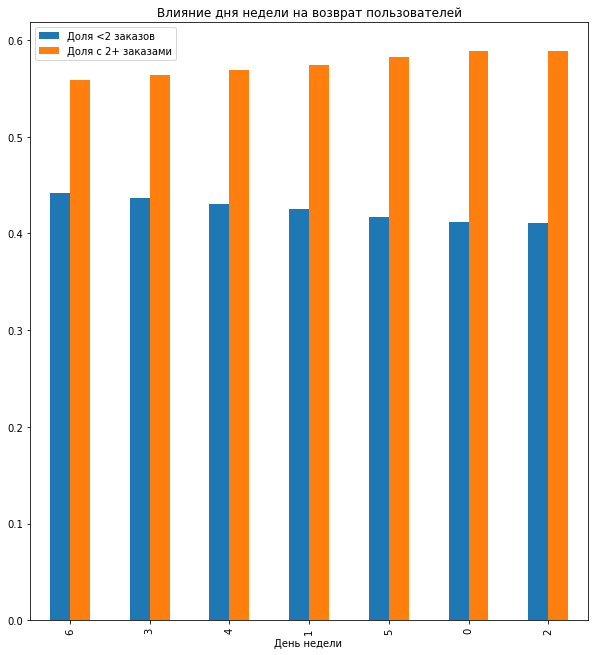

In [168]:
day_plot.sort_values(by=1).plot(kind='bar',
                                 figsize=(10,11),
                                 title='Влияние дня недели на возврат пользователей',
                                 xlabel='День недели ')
plt.legend(['Доля <2 заказов','Доля с 2+ заказами'])

День недели на возврат пользователей почти не влияет: самый низкий %возврата был в воскресенье(55) , самый высокий в среду (58,5)

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по дням недели  <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здесь все корректно. Различия по дням недели все же наблюдаеются, хотя и не очень заметные. Чтобы судить более однозначно, было бы неплохо сопроводить сравнение оценкой стат. значимости. Это будет изучаться далее на курсе.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Вместо порядковых номеров дней недели для удобства все же стоит брать наименования. Наименования дней недели можно получить через `.dt.day_name()`.
    
    
* Возвращаемость гораздо проще посчитать через `mean`.
    
    
* На графике, чтобы не перегружать лишним, лучше оставить только долю вернувшихся. Также было бы не лишним добавить линию общей возвращаемости по выборки, чтобы относительно нее было удобно сравнивать отклонения того или иного дня.
    
    
* В выводах было бы неплохо также предположить, почему в топ и антитоп (которые все-таки создается, хотя и на так явно) выбиваются определенные дни недели? Какие суждения относительно этого можно выстроить?


</div>

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [169]:
filt_df.head()

,user_id,first_order,last_order,device_type,region,service_name_first,event_type_first,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean,is_two,is_five
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,каменевский регион,край билетов,театр,1,1521.939941,4.000000,-1.000000,0,0
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,каменевский регион,мой билет,выставки,2,774.010010,3.000000,36.500000,1,0
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,североярская область,лови билет!,другое,3,767.213318,2.666667,33.333333,1,0
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,каменевский регион,край билетов,театр,1,917.830017,4.000000,-1.000000,0,0
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,поленовский край,лучшие билеты,театр,2,61.309998,1.500000,7.000000,1,0


In [170]:
time24_df=filt_df[(filt_df['is_two']==1)&(filt_df['is_five']==0)&(filt_df['days_since_prev_mean']>=0)]

In [171]:
time5plus_df=filt_df[filt_df['is_five']==1]

In [172]:
time24_df['days_since_prev_mean'].mean()

19.091873185979015

In [173]:
time5plus_df['days_since_prev_mean'].mean()

10.793694946993801

У постоянных клиентов с 5+ заказами интервал в полтора раза меньше чем у второй группы. Возможно чем меньше интервал , тем больше вероятность повторного заказа

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по количеству дней между заказами <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По расчетам все верно!
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>    
    
* Важно иметь в виду, что среднее значение довольно сильно зависит от характера распределения, если есть какие-то сильные выбросы, они могут утянуть среднее значение вверх, хотя основаня масса значений будет гораздо ниже. Поэтому здесь важно было бы построить в том числе гистограммы, наложить их друг на друга (как мы это делали при сравнении выручки), чтобы видеть всю картину в данных.
    
    
* Опять же, что для нас значит полученный результат? Какой инсайт из этого можно извлечь? Твой вывод довольно банален - логично, что на ограниченном промежутке врмени у клиента с большим количеством заказов интервалы будут меньше. Здесь стоит сделать обратный ход - подумать, как по интервалу времени после первого заказа можно определять, есть ли шанс, что клиент еще вернется самостоятельно, или пора пора подключать стратегии для вовлеченя в новый заказ.

</div>

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [174]:
filt_df.head()

,user_id,first_order,last_order,device_type,region,service_name_first,event_type_first,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean,is_two,is_five
0,0002849b70a3ce2,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,каменевский регион,край билетов,театр,1,1521.939941,4.000000,-1.000000,0,0
1,0005ca5e93f2cf4,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,каменевский регион,мой билет,выставки,2,774.010010,3.000000,36.500000,1,0
2,000898990054619,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,североярская область,лови билет!,другое,3,767.213318,2.666667,33.333333,1,0
3,00096d1f542ab2b,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,каменевский регион,край билетов,театр,1,917.830017,4.000000,-1.000000,0,0
4,000a55a418c128c,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,поленовский край,лучшие билеты,театр,2,61.309998,1.500000,7.000000,1,0


In [175]:
filt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18390 entries, 0 to 21916
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               18390 non-null  object        
 1   first_order           18390 non-null  datetime64[ns]
 2   last_order            18390 non-null  datetime64[ns]
 3   device_type           18390 non-null  object        
 4   region                18390 non-null  object        
 5   service_name_first    18390 non-null  object        
 6   event_type_first      18390 non-null  object        
 7   order_count           18390 non-null  int64         
 8   revenue_rub_mean      18390 non-null  float32       
 9   tickets_count_mean    18390 non-null  float64       
 10  days_since_prev_mean  18390 non-null  float64       
 11  is_two                18390 non-null  int64         
 12  is_five               18390 non-null  int64         
dtypes: datetime64[ns

In [176]:
!pip install phik -q

In [177]:
from phik import phik_matrix
import seaborn as sns

In [178]:
corr_df=day_df[['device_type','region','service_name_first','event_type_first','order_count',
         'revenue_rub_mean','tickets_count_mean','days_since_prev_mean','day_of_week']]

In [179]:
corr_df

,device_type,region,service_name_first,event_type_first,order_count,revenue_rub_mean,tickets_count_mean,days_since_prev_mean,day_of_week
0,mobile,каменевский регион,край билетов,театр,1,1521.939941,4.000000,-1.000000,1
1,mobile,каменевский регион,мой билет,выставки,2,774.010010,3.000000,36.500000,1
2,mobile,североярская область,лови билет!,другое,3,767.213318,2.666667,33.333333,5
3,desktop,каменевский регион,край билетов,театр,1,917.830017,4.000000,-1.000000,3
4,mobile,поленовский край,лучшие билеты,театр,2,61.309998,1.500000,7.000000,6
...,...,...,...,...,...,...,...,...,...
21911,mobile,малиновая область,лучшие билеты,другое,4,50.514999,2.250000,19.250000,2
21912,mobile,каменевский регион,мой билет,другое,9,688.043335,2.555556,11.555556,1
21913,desktop,каменевский регион,билеты без проблем,стендап,2,850.994995,2.500000,36.500000,3
21915,desktop,широковская область,билеты без проблем,стендап,1,661.530029,2.000000,-1.000000,1


In [180]:
corr_matrix=corr_df.phik_matrix()

interval columns not set, guessing: ['order_count', 'revenue_rub_mean', 'tickets_count_mean', 'days_since_prev_mean', 'day_of_week']


In [181]:
corr_matrix['order_count']

device_type             0.031782
region                  0.000000
service_name_first      0.025411
event_type_first        0.023412
order_count             1.000000
revenue_rub_mean        0.047821
tickets_count_mean      0.647807
days_since_prev_mean    0.687486
day_of_week             0.000000
Name: order_count, dtype: float64

<AxesSubplot:>

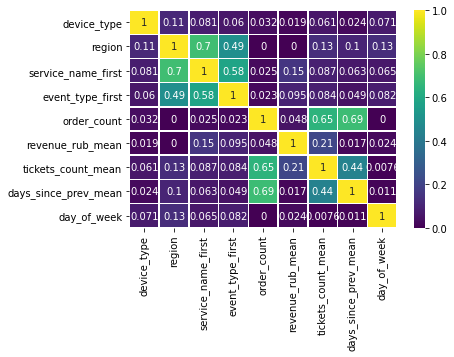

In [182]:
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,cmap='viridis')

Умеренная корреляция order_count с двумя признаками: cреднее кол-во билетов(tickets_count_mean) в заказе и количество дней между заказами(days_since_prev_mean), и слабая с выручкой от заказа(revenue_rub_mean)

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ корреляции <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здесь в целом все верно.

</div>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Чтобы алгоритму корреляции не приходилось самостоятельно отбирать признаки, которые нуждаются в бинниге, их лучше самостоятельно обозначать через параметр `interval_cols`.
    
    
* Мы не получили для `orders_count` полностью нулевых корреляций, но ради эксперимента все же можно было бы проверить, насколько сильно поменяются оценки, если проверять корреляцию со сбалансированным разбиением на интервалы.
    
    
* Расцветку для тепловой карты имеет смысл выбирать трехцветную, если диапазон возможных значений от -1 до 1 (например, синий, белый, красный, белый при этом в нуле), или двухцветную, если от 0 до 1 (в 0 - белый, в 1 - красный). Поскольку на 0 будет нейтральный цвет, величину корреляции можно будет воспринимать через интенсивность цвета, а по самому цвету - положительная она или отрицательная. Phik всегда принимает значения только в диапазоне 0-1.
    
    
*  Выводы, опять же, очень скудные. Что для нас это значит? Почему высокая корреляция получается с одиними признаками и низкая с другими? Что по итогу важно для манипулирования возвращаемостью клиентов, а что нет? Как это связано с результатами на наших предыдущих шагах?
    
    
* Напоминаю про ограничивание количества выводимых строк.

</div>

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

###### Информация о данных

Данные состоят из двух датасетов: 

df - набор данных о пользователях Яндекс.Афиши, 15 столбцов,290611 строк 
df_currency - Данные о курсе валют за 2024 год, 3 столбца, 357 строк 


Проведена предобработка данных:

В датасете df_currency:

поле “data” приведено к типу datetime для удобства работы и создано поле coeff_cur для возможности перевода в единую валюту 

В датасете df:


- в полях с вещественными и целыми числами понижена размерность
- Категориальные данные приведены к нижнему регистру 
- Создано новое поле revenue_rub, которое отображает выручку в единой валюте - российском рубле 
- добавлено два бинарных признака «is_two»- пользователи сделавшие два заказа и более , «is_five» - сделавшие 5 заказов и более
- 


   Создан профиль пользователя в котором:

      - Данные выручки revenue_rub отфильтрованы по 99-му процентилю 
      - Данные по количеству заказов order_count отфильтрованы по 87-му процентилю
      - Данные по среднему количеству билетов ticket_count_mean в заказе отфильтрованы по 96-му перцентилю

Общий обьем отфильтрованных данных - 3616 строк. 
Отфильтрованный датасет содержит 18232 строки.

###### Основные результаты анализа

Сегменты 'Концерты', 'другое' и 'театр' чаще всего возвращаются на платформу. 
 
Тип мероприятия влияет на вероятность возврата на Яндекс.Афишу. Самый высокий процент возврата у выставок -60%, самый низкий - спорт, 52%

В популярных регионах доля повторных заказов выше чем в регионах с низкой активностью.

При сравнении групп пользователей по количеству заказов, выяснилось что с увеличением количества заказов пользователи выбирают все более дорогие мероприятия и растет выручка с заказа.

При сравнении групп пользователей по среднему количеству билетов в заказе, выяснилось что сегмент от 2 до 3 билетов показал 67% повторных покупок , что на 17% выше среднего. Возможно семьи,маленькие компании склонны чаще возвращаться на платформу.

День недели на возврат пользователей почти не влияет: самый низкий %возврата был в воскресенье(55) , самый высокий в среду (58,5)

У постоянных клиентов с 5+ заказами интервал между заказами в полтора раза меньше чем у второй группы. Возможно чем меньше интервал , тем больше вероятность повторного заказа.

Количество заказов сильно кореллирует со cредним кол-во билетов в заказе((0,64),умеренно с количеством дней между заказами(0,5) и слабо с выручкой от заказа(0,24)



###### Рекомендации
Обратить внимание на сегменты типа:'концерт','выставка','театр'. У этих категорий самый высокий процент возвратов пользователей.
Обратить внимание на менее активные регионы, там самый высокий % возвратов.
Сделать упор на 'пары','семейных' пользователей и маленькие компании, в этом сегменте на 17% выше возвраты.
Количество заказов сильно коррелирует со средним количеством билетов, возможно стоит пробовать стимулировать пользователей приобретать больше билетов.





<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Итоговые выводы <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> С задачей справились! Все ключевые моменты отражены, что позволяет быстро ознакомиться с процессом работы и результатом, не вдаваясь в технический детали. Здорово, что завершаешь проект рекомендациями, основанные на выявленных закономерностях. Предложенные рекомендации логично следуют из анализа и могут быть непосредственно реализованы в маркетинговых стратегиях подогревания и удержания. 

</div>

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Вставьте ссылку на проект в этой ячейке тетрадки перед отправкой проекта на ревью.**

https://github.com/AlexTreshalov98/Finish-project-2

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Публикация в Git <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По ссылке есть все необходимые данные. 

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Можно заполнить readme полезной информацией о проекте, зафиксировать цели, указать ключевые моменты и полученные выводы.

</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Не забудь обновить файл с проектом, после того, как засекретишь подключение к БД, а также включить файл с паролями в игнорируемый. Файл `.env` публиковаться не должен.
</div>

<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<h3>Общий вывод по проекту <a class="tocSkip"></h3>
    
Алексей, спасибо за твой проект! У тебя неплохая работа, однако есть еще моменты, которые требуют твоего внимания. Кратко пройдусь по впечатлениям. 
    
**Полнота:** все требуемые задачи были выполнены!
    
**Корректность:** 
   
* <span style="color:Red;">Необходимо засекретить подключение к БД, чтобы не скомпромитировать явки и пароли. Не забываем обновить файл в Git.</span>
* <span style="color:Red;">Необходимо расширить предобработку данных. Проверка на наличие пропусков, неявных дубликатов и невалидных значений - важные этапы предобработки по умолчанию.</span>
* <span style="color:Red;">Необходимо скорректировать анализ гипотезы относительно возвращаемости по регионам.</span>

**Аналитическая проницательность:** ты в целом верно подмечаешь все ключевые нюансы данных, даешь дельные рекомендации! Местами можно чуть углубить суждения, фиксировать не только то, что наблюдаем, но и предполагать, почему получилось именно так. 
    
**Эффективность кода:** по этому критерию есть еще куда расти! В некоторых местах можно использовать чуть более удобные и компактные методы, зацикливать повторяющиеся действия, не засорять оперативную память лишними объектами.
    
**Оформление:** им тоже важно не пренебрегать! Оформление тесно связано с удобством восприятия предоставляемой информации и созданием впечатления о работе. Сейчас твоя работа довольно небрежная, еще есть большой потенциал для улучшений (смотри по ходу работы). Из важного: <span style="color:Red;">необходимо сопровождать графики всеми необходимыми для его чтения подписями..</span>
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
<img src="https://99px.ru/sstorage/86/2015/12/image_86271215043043632690.gif" />